In [1]:
import re
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt




In [2]:
# Set pandas options to display all columns and rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows

In [3]:
years = ['2021', '2022', '2023', '2024']
races = ['TOR330', 'TOR450', 'TOR130']

## Looping through scraped data from 100X100trail

In [4]:
races = ['TOR330'
        # ,'TOR450'
        ]
years = ['2023']

TORX_df = {}

for race in races:
    for year in years:
        df = pd.read_excel(f'{race} Data/100x100trail/aid_station_{race}_{year}.xlsx',
                                 dtype={'Start Date': 'string',
                                        'Year': 'string'})
        print(f'{race}_{year} {df.shape}')
        # Store the DataFrame in the dictionary with a key like 'TOR330_2021'
        TORX_df[f'{race}_{year}'] = df
    print('*'*50)
        
#         print(f"Data read from f'{race}_{year}.xlsx'")


TOR330_2023 (42964, 10)
**************************************************


In [5]:
TORX_df_concat = pd.concat(TORX_df)

In [6]:
TOR330 = TORX_df_concat[TORX_df_concat['Year'] == '2023']
TOR330.head()

Name  Bib Sex Nationality    Race  Year Category  \
TOR330_2023 0  Colle Franco    2   M          IT  TOR330  2023       V1   
            1  Colle Franco    2   M          IT  TOR330  2023       V1   
            2  Colle Franco    2   M          IT  TOR330  2023       V1   
            3  Colle Franco    2   M          IT  TOR330  2023       V1   
            4  Colle Franco    2   M          IT  TOR330  2023       V1   

                                        Place                       Time  \
TOR330_2023 0                660 - FINISH 330  2023-09-13T04:39:16+02:00   
            1      650 - Monte de la Saxe 450  2023-09-13T03:52:25+02:00   
            2  640 - Pas Entre Deux Sauts 450  2023-09-13T02:23:36+02:00   
            3         630 - Rif. Frassati 450  2023-09-13T00:45:25+02:00   
            4                620 - Bosses 330  2023-09-12T22:30:41+02:00   

               Status  
TOR330_2023 0    True  
            1    True  
            2    True  
            3    True  
            4    True

### DUV and ITRA data

In [7]:
    TORX_duv_df = pd.read_excel(f'Database Data/TORX_duv_df.xlsx',
                                     dtype={'Start Date': 'string',
                                            'Year': 'string'})

    TORX_itra_no_DNF = pd.read_excel(f'Database Data/TORX_itra_no_DNF.xlsx',
                                     dtype={'Start Date': 'string',
                                           'Year': 'string'})

In [8]:
def find_out_the_rows_difference_between_datasets(df):
    for year in years :
        for race in races:
            print(race, year)
            print('ITRA', TORX_itra_no_DNF[(TORX_itra_no_DNF['Year'] == year) &
                              (TORX_itra_no_DNF['Race'] == race)].shape)
            print('DUV',TORX_duv_df[(TORX_duv_df['Year'] == year) &
                              (TORX_duv_df['Race'] == race)].shape)
            print('TOR330',df[(df['Year'] == year) &
                          (df['Race'] == race) &
                              (df['Status'] == True)].shape)
        print('\n', '*'*20)


### Exploring whether RITIRIO is the same as FALSE

In [9]:
retired_but_with_status_true = TOR330[(TOR330['Place'].str.contains('RITIRO')) &
       (TOR330['Status'] == True)]

list_of_names_retired_but_with_status_true  = list(retired_but_with_status_true['Name'].unique())

retired_but_with_status_true 

Name   Bib Sex Nationality    Race  Year  \
TOR330_2023 73            Verjee Sabrina    48   F          GB  TOR330  2023   
            2381          Brumana Andrea    62   M          IT  TOR330  2023   
            7267      Hartmuth Katharina   665   F          CH  TOR330  2023   
            8901          Smith Jonathan  1321   M          AU  TOR330  2023   
            32389  Houteer Magni Justine   275   F          FR  TOR330  2023   

                  Category                             Place  \
TOR330_2023 73          V1      290 - Donnas IN 330 - RITIRO   
            2381        V1     520 - Rif. Magià 330 - RITIRO   
            7267       SEN      290 - Donnas IN 330 - RITIRO   
            8901        V2     291 - Donnas OUT 450 - RITIRO   
            32389       V1  381 - Gressoney OUT 330 - RITIRO   

                                        Time  Status  
TOR330_2023 73     2023-09-11T14:00:51+02:00    True  
            2381   2023-09-13T10:28:07+02:00    True  
            7267   2023-09-11T14:00:58+02:00    True  
            8901   2023-09-12T17:18:56+02:00    True  
            32389  2023-09-14T01:33:04+02:00    True

In [10]:
# How many have 'RITIRIO
TOR330[TOR330['Place'].str.contains('RITIRO')].shape

(135, 10)

In [11]:
# How many have not finished
len(list(TOR330['Name'][TOR330['Status'] == False].unique()))

576

### Cleaning Place column

In [12]:
TOR330['Place'].unique()

array(['660 - FINISH 330', '650 - Monte de la Saxe 450',
       '640 - Pas Entre Deux Sauts 450', '630 - Rif. Frassati 450',
       '620 - Bosses 330', '610 - Ponteille Desot 450',
       '590 - Rif. Champillon 450', '581 - Ollomont OUT 330',
       '580 - Ollomont IN 330', '570 - Berio Damon 330',
       '565 - Col Brison 330', '551 - Oyace OUT 330',
       '550 - Oyace IN 330', '540 - Biv. R. Clermont 330',
       '530 - Rif. Cuney 330', '520 - Rif. Magià 330',
       '490 - Rif. Barmasse 330', '481 - Valtournenche OUT 330',
       '480 - Valtournenche IN 330', '470 - Rif. Grand Tournalin 330',
       '460 - Champoluc 330', '450 - Rif. Alpenzu 330',
       '381 - Gressoney OUT 330', '380 - Gressoney IN 330', '370 - Loo',
       '360 - Niel La Gruba 450', '350 - Col della Vecchia',
       '340 - Lago Chiaro', '330 - Rif. della Barma 450',
       '320 - Rif. Coda 450', '310 - Sassa', '300 - Perloz',
       '291 - Donnas OUT 450', '290 - Donnas IN 330', '260 - Pontboset',
       '250 - 

In [13]:
TOR330['aid_stations'] = TOR330['Place'].str.split(r'^\d+ - ').str.get(-1)

TOR330['aid_stations'] = TOR330['aid_stations'].str.replace(r'\d+', '', regex=True)
TOR330['aid_stations'] = TOR330['aid_stations'].str.split('|').str.get(0)
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rif.', 'Rifugio')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Biv.','Bivacco')
TOR330['aid_stations'] = TOR330['aid_stations'].str.strip()

TOR330['RITIRIO'] = np.where(
    TOR330['aid_stations'].str.contains('RITIRO', na=False), 
    TOR330['aid_stations'], 
    ''
)
# TOR330['RITIRIO] =TOR330['RITIRIO].str.replace('- RITIRO', '')
TOR330['aid_stations'] = TOR330['aid_stations'].str.split(' - RITIRO').str.get(0)
TOR330['aid_stations'].unique()

C:\Users\Karina\AppData\Local\Temp\ipykernel_13696\857702632.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rif.', 'Rifugio')
C:\Users\Karina\AppData\Local\Temp\ipykernel_13696\857702632.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Biv.','Bivacco')


array(['FINISH', 'Monte de la Saxe', 'Pas Entre Deux Sauts',
       'Rifugio Frassati', 'Bosses', 'Ponteille Desot',
       'Rifugio Champillon', 'Ollomont OUT', 'Ollomont IN', 'Berio Damon',
       'Col Brison', 'Oyace OUT', 'Oyace IN', 'Bivacco R. Clermont',
       'Rifugio Cuney', 'Rifugio Magià', 'Rifugio Barmasse',
       'Valtournenche OUT', 'Valtournenche IN', 'Rifugio Grand Tournalin',
       'Champoluc', 'Rifugio Alpenzu', 'Gressoney OUT', 'Gressoney IN',
       'Loo', 'Niel La Gruba', 'Col della Vecchia', 'Lago Chiaro',
       'Rifugio della Barma', 'Rifugio Coda', 'Sassa', 'Perloz',
       'Donnas OUT', 'Donnas IN', 'Pontboset', 'Chardonney',
       'Rifugio Dondena', 'Goilles', 'Cogne OUT', 'Cogne IN',
       'Rifugio Sella', 'Eaux Rousse', 'Rhemes-Notre-Dame', 'Chalet Epee',
       'Valgrisenche OUT', 'Valgrisenche IN', 'Planaval',
       'Bivacco Zappelli', 'Rifugio Deffeyes', 'La Thuile',
       'Baite Youlaz', 'START', 'PETTORALI', 'Parco Bollino',
       'Donnas IN ', 

In [14]:
TOR330['RITIRIO'].unique()

array(['', 'Donnas IN  - RITIRO', 'Rifugio Magià  - RITIRO',
       'Donnas OUT  - RITIRO', 'Gressoney OUT  - RITIRO',
       'Ollomont OUT  - RITIRO', 'Ollomont IN  - RITIRO',
       'Lago Chiaro - RITIRO', 'Oyace IN  - RITIRO',
       'Valtournenche OUT  - RITIRO', 'Champoluc  - RITIRO',
       'Sassa - RITIRO', 'Rifugio della Barma  - RITIRO',
       'Gressoney IN  - RITIRO', 'Niel La Gruba  - RITIRO',
       'Col della Vecchia - RITIRO', 'Chardonney - RITIRO',
       'Valgrisenche OUT - RITIRO', 'Rifugio Dondena  - RITIRO',
       'Goilles - RITIRO', 'Cogne OUT  - RITIRO', 'Cogne IN  - RITIRO',
       'Rifugio Sella  - RITIRO', 'Eaux Rousse - RITIRO',
       'Rhemes-Notre-Dame - RITIRO', 'Chalet Epee - RITIRO',
       'Valgrisenche IN - RITIRO', 'La Thuile - RITIRO',
       'Baite Youlaz - RITIRO'], dtype=object)

In [15]:
# dropping rows with PETTORALI
TOR330 = TOR330[~(TOR330['Place'].str.contains('PETTORALI'))].reset_index(drop=True)
TOR330.head()

,Name,Bib,Sex,Nationality,Race,Year,Category,Place,Time,Status,aid_stations,RITIRIO
0,Colle Franco,2,M,IT,TOR330,2023,V1,660 - FINISH 330,2023-09-13T04:39:16+02:00,True,FINISH,
1,Colle Franco,2,M,IT,TOR330,2023,V1,650 - Monte de la Saxe 450,2023-09-13T03:52:25+02:00,True,Monte de la Saxe,
2,Colle Franco,2,M,IT,TOR330,2023,V1,640 - Pas Entre Deux Sauts 450,2023-09-13T02:23:36+02:00,True,Pas Entre Deux Sauts,
3,Colle Franco,2,M,IT,TOR330,2023,V1,630 - Rif. Frassati 450,2023-09-13T00:45:25+02:00,True,Rifugio Frassati,
4,Colle Franco,2,M,IT,TOR330,2023,V1,620 - Bosses 330,2023-09-12T22:30:41+02:00,True,Bosses,


In [16]:
TOR330[~(TOR330['RITIRIO'] == '')]

,Name,Bib,Sex,Nationality,Race,Year,Category,Place,Time,Status,aid_stations,RITIRIO
71,Verjee Sabrina,48,F,GB,TOR330,2023,V1,290 - Donnas IN 330 - RITIRO,2023-09-11T14:00:51+02:00,True,Donnas IN,Donnas IN - RITIRO
2336,Brumana Andrea,62,M,IT,TOR330,2023,V1,520 - Rif. Magià 330 - RITIRO,2023-09-13T10:28:07+02:00,True,Rifugio Magià,Rifugio Magià - RITIRO
7130,Hartmuth Katharina,665,F,CH,TOR330,2023,SEN,290 - Donnas IN 330 - RITIRO,2023-09-11T14:00:58+02:00,True,Donnas IN,Donnas IN - RITIRO
8733,Smith Jonathan,1321,M,AU,TOR330,2023,V2,291 - Donnas OUT 450 - RITIRO,2023-09-12T17:18:56+02:00,True,Donnas OUT,Donnas OUT - RITIRO
31785,Houteer Magni Justine,275,F,FR,TOR330,2023,V1,381 - Gressoney OUT 330 - RITIRO,2023-09-14T01:33:04+02:00,True,Gressoney OUT,Gressoney OUT - RITIRO
33111,Delafond Sandra,1560,F,FR,TOR330,2023,V1,291 - Donnas OUT 450 - RITIRO,2023-09-13T03:44:36+02:00,False,Donnas OUT,Donnas OUT - RITIRO
33132,Compan Jean-Philippe,1403,M,FR,TOR330,2023,V1,291 - Donnas OUT 450 - RITIRO,2023-09-13T03:44:00+02:00,False,Donnas OUT,Donnas OUT - RITIRO
33622,Pang Kin Sun,610,M,HK,TOR330,2023,V2,581 - Ollomont OUT 330 - RITIRO,2023-09-15T11:34:58+02:00,False,Ollomont OUT,Ollomont OUT - RITIRO
33664,Chartie Vincent,321,M,FR,TOR330,2023,V1,581 - Ollomont OUT 330 - RITIRO,2023-09-15T18:39:01+02:00,False,Ollomont OUT,Ollomont OUT - RITIRO
33708,Rigoux Pascal,264,M,FR,TOR330,2023,V2,581 - Ollomont OUT 330 - RITIRO,2023-09-15T19:04:40+02:00,False,Ollomont OUT,Ollomont OUT - RITIRO


### Reading in TORX dates extracted from DUV

In [31]:
file = f'Database Data/TORX_duv_dates_df.xlsx'
dates_duv_df = pd.read_excel(file)

# Drop the intermediate columns if they're no longer needed
dates_duv_df = dates_duv_df.drop(columns=['Day_of_Week Start_Date'])    
dates_duv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Race        26 non-null     object        
 1   Year        26 non-null     int64         
 2   Start Date  26 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 752.0+ bytes


In [89]:
# Extract only the date part (YYYY-MM-DD)
D1_dates = dates_duv_df['Start Date'][(dates_duv_df['Year'] == year) & 
                                      (dates_duv_df['Race'] == 'TOR450')].unique()

D1 = [str(date)[:10] for date in D1_dates]
D1 = pd.to_datetime(D1)

# Create the dictionary to hold all dates
dates_dict = {
    'D1': D1,
    'D2': D1 + pd.to_timedelta('1 day'),
    'D3': D1 + pd.to_timedelta('2 days'),
    'D4': D1 + pd.to_timedelta('3 days'),
    'D5': D1 + pd.to_timedelta('4 days'),
    'D6': D1 + pd.to_timedelta('5 days'),
    'D7': D1 + pd.to_timedelta('6 days'),
    'D8': D1 + pd.to_timedelta('7 days'),
    'D9': D1 + pd.to_timedelta('8 days'),
    'D10': D1 + pd.to_timedelta('9 days')
}

# Access the dictionary
print(dates_dict)


{'D1': DatetimeIndex(['2023-09-08'], dtype='datetime64[ns]', freq=None), 'D2': DatetimeIndex(['2023-09-09'], dtype='datetime64[ns]', freq=None), 'D3': DatetimeIndex(['2023-09-10'], dtype='datetime64[ns]', freq=None), 'D4': DatetimeIndex(['2023-09-11'], dtype='datetime64[ns]', freq=None), 'D5': DatetimeIndex(['2023-09-12'], dtype='datetime64[ns]', freq=None), 'D6': DatetimeIndex(['2023-09-13'], dtype='datetime64[ns]', freq=None), 'D7': DatetimeIndex(['2023-09-14'], dtype='datetime64[ns]', freq=None), 'D8': DatetimeIndex(['2023-09-15'], dtype='datetime64[ns]', freq=None), 'D9': DatetimeIndex(['2023-09-16'], dtype='datetime64[ns]', freq=None), 'D10': DatetimeIndex(['2023-09-17'], dtype='datetime64[ns]', freq=None)}


### Reading in TOR330 Data on elevation / distance

A copy of the original 'TOR330 - Downloads.xlsx' and 'TOR450 - Downloads.xlsx' and were changed to reflect the downloaded 100x100trail data 

In [17]:
TOR330_aid_station_info_df = pd.read_excel('TOR330 Data/TOR330 - Timetable.xlsx', sheet_name = 'Sheet1')

# organising the data in the correct order by 'distance\nfrom START\n(km)'
TOR330_aid_station_info_df = TOR330_aid_station_info_df.sort_values(by ='distance\nfrom START\n(km)')

TOR330_aid_station_list= list(TOR330_aid_station_info_df['100X100trail Aid Stations'].unique())

print(TOR330_aid_station_list)

['START', 'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 'Bivacco Zappelli', 'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT', 'Chalet Epee', 'Rhemes-Notre-Dame', 'Eaux Rousse', 'Rifugio Sella', 'Cogne OUT', 'Cogne IN', 'Goilles', 'Rifugio Dondena', 'Chardonney', 'Pontboset', 'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa', 'Rifugio Coda', 'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia', 'Niel La Gruba', 'Loo', 'Gressoney IN', 'Gressoney OUT', 'Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin', 'Valtournenche IN', 'Valtournenche OUT', 'Rifugio Barmasse', 'Vareton', 'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 'Oyace IN', 'Bruson Arp', 'Col Brison', 'Berio Damon', 'Ollomont IN', 'Ollomont OUT', 'Rifugio Champillon', 'Ponteille Desot', 'Bosses', 'Rifugio Frassati', 'Pas Entre Deux Sauts', 'Monte de la Saxe', 'FINISH']


In [18]:
TOR330_aid_station_info_df.head()

,100X100trail Aid Stations,Waypoint,altitude\n(m),distance\nfrom START\n(km),distance\nfrom previous point\n(km),D+\nfrom START (m),D+\nfrom previous point\n(m),D-\nfrom previous point\n(m),POI tipology*,Wave 1 Cut off time,Wave 2 Cut off time
0,START,Start,1224,0.00,0.00,0,0,0.0,START,NaN,NaN
1,Baite Youlaz,Baite Youlaz,2036,12.83,12.83,1467,2,534.0,R,NaN,NaN
2,La Thuile,La Thuile,1468,18.98,6.15,1602,135,702.0,R+A,D3 15.30,D3 17.30
3,Rifugio Deffeyes,Rifugio Deffeyes,2489,27.86,8.88,2828,1226,205.0,R,NaN,NaN
4,Bivacco Zappelli,Bivacco Zappelli,2273,32.78,4.92,3255,427,585.0,R+A,NaN,NaN


In [90]:
TOR330_aid_station_info_df['Wave 1 Cut off time'] =TOR330_aid_station_info_df['Wave 1 Cut off time'].str.replace('.', ':')

C:\Users\Karina\AppData\Local\Temp\ipykernel_13696\2701578697.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  TOR330_aid_station_info_df['Wave 1 Cut off time'] =TOR330_aid_station_info_df['Wave 1 Cut off time'].str.replace('.', ':')


In [100]:
cutoffs_df = TOR330_aid_station_info_df[['Waypoint','Wave 1 Cut off time']][~(TOR330_aid_station_info_df['Wave 1 Cut off time'].isna()) &
                                                                            (TOR330_aid_station_info_df['Wave 1 Cut off time'] != 'MID-RACE')
                                                                           ]


cutoffs_df

,Waypoint,Wave 1 Cut off time
2,La Thuile,D3 15:30
6,Valgrisenche IN,D4 5:00
7,Valgrisenche OUT,D4 07:00
10,Eaux Rousses,D4 19:30
13,Cogne OUT,D5 06:00
12,Cogne IN,D5 04:00
18,Donnas IN,D6 00:00
19,Donnas OUT,D6 02:00
23,Rifugio Del Lago Della Barma,D6 13:00
26,Niel - Dortoir La Gruba,D6 19:30


In [ ]:
# Split the Wave 1 into 'D1' and '15:30'
# look for the correct time from the dictionary
# put back together 
# drop irrelevant columns
# Add 2 hours for the Wave 2 time
# Pivot based on wave so that there are 2 rows for each stop
# put in columns 'Year' and 'Race'
# merge on the column 'wave', 'year and 'race'

### Cleaning Time column

In [19]:
TOR330.head()

,Name,Bib,Sex,Nationality,Race,Year,Category,Place,Time,Status,aid_stations,RITIRIO
0,Colle Franco,2,M,IT,TOR330,2023,V1,660 - FINISH 330,2023-09-13T04:39:16+02:00,True,FINISH,
1,Colle Franco,2,M,IT,TOR330,2023,V1,650 - Monte de la Saxe 450,2023-09-13T03:52:25+02:00,True,Monte de la Saxe,
2,Colle Franco,2,M,IT,TOR330,2023,V1,640 - Pas Entre Deux Sauts 450,2023-09-13T02:23:36+02:00,True,Pas Entre Deux Sauts,
3,Colle Franco,2,M,IT,TOR330,2023,V1,630 - Rif. Frassati 450,2023-09-13T00:45:25+02:00,True,Rifugio Frassati,
4,Colle Franco,2,M,IT,TOR330,2023,V1,620 - Bosses 330,2023-09-12T22:30:41+02:00,True,Bosses,


In [20]:
# 2024-09-11T07:08:32+02:00

# Split the 'Time' column to remove the timezone offset
TOR330['new_Time'] = TOR330['Time'].str.split('+').str[0]

# Convert the cleaned time string to a datetime object
TOR330['new_Time'] = pd.to_datetime(TOR330['new_Time'])

# # Add the 2-hour offset using timedelta
# TOR330['new_Time'] = TOR330['new_Time'] + pd.to_timedelta('02:00:00')

# Preview the DataFrame
TOR330.head()

,Name,Bib,Sex,Nationality,Race,Year,Category,Place,Time,Status,aid_stations,RITIRIO,new_Time
0,Colle Franco,2,M,IT,TOR330,2023,V1,660 - FINISH 330,2023-09-13T04:39:16+02:00,True,FINISH,,2023-09-13 04:39:16
1,Colle Franco,2,M,IT,TOR330,2023,V1,650 - Monte de la Saxe 450,2023-09-13T03:52:25+02:00,True,Monte de la Saxe,,2023-09-13 03:52:25
2,Colle Franco,2,M,IT,TOR330,2023,V1,640 - Pas Entre Deux Sauts 450,2023-09-13T02:23:36+02:00,True,Pas Entre Deux Sauts,,2023-09-13 02:23:36
3,Colle Franco,2,M,IT,TOR330,2023,V1,630 - Rif. Frassati 450,2023-09-13T00:45:25+02:00,True,Rifugio Frassati,,2023-09-13 00:45:25
4,Colle Franco,2,M,IT,TOR330,2023,V1,620 - Bosses 330,2023-09-12T22:30:41+02:00,True,Bosses,,2023-09-12 22:30:41


In [21]:
TOR330.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41758 entries, 0 to 41757
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          41758 non-null  object        
 1   Bib           41758 non-null  int64         
 2   Sex           41758 non-null  object        
 3   Nationality   41758 non-null  object        
 4   Race          41758 non-null  object        
 5   Year          41758 non-null  string        
 6   Category      41758 non-null  object        
 7   Place         41758 non-null  object        
 8   Time          41758 non-null  object        
 9   Status        41758 non-null  bool          
 10  aid_stations  41758 non-null  object        
 11  RITIRIO       41758 non-null  object        
 12  new_Time      41758 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int64(1), object(9), string(1)
memory usage: 3.9+ MB


### PIVOTING the Dataset

In [22]:
# Pivot the data so that each year appears in its own column
pivoted_TOR330 = TOR330.pivot_table(
    index=['Name','Bib', 'Sex', 
           'Nationality', 'Category', 'Race','Year', 'Status'# , 'RITIRIO'
          ],
    columns='aid_stations',  
    values='new_Time',
    aggfunc='first'  # Ensures only the first match is kept in case of duplicates
).reset_index()

# Rename columns for clarity
# pivoted_TOR330.columns.name = None  # Remove multi-index name
# pivoted_TOR330 = pivoted_TOR330.rename_axis(None, axis=1)  # Remove year axis name
pivoted_TOR330.head()

aid_stations,Name,Bib,Sex,Nationality,Category,Race,Year,Status,Baite Youlaz,Berio Damon,Bivacco R. Clermont,Bivacco Zappelli,Bosses,Bruson Arp,Chalet Epee,Champoluc,Champoluc,Chardonney,Cogne IN,Cogne IN,Cogne OUT,Cogne OUT,Col Brison,Col della Vecchia,Donnas IN,Donnas IN,Donnas OUT,Donnas OUT,Eaux Rousse,FINISH,Goilles,Gressoney IN,Gressoney IN,Gressoney OUT,Gressoney OUT,La Thuile,Lago Chiaro,Loo,Mont de la Saxe,Monte de la Saxe,Niel La Gruba,Niel La Gruba,Ollomont IN,Ollomont IN,Ollomont OUT,Ollomont OUT,Oyace IN,Oyace IN,Oyace OUT,Parco Bollino,Pas Entre Deux Sauts,Perloz,Planaval,Pontboset,Ponteille Desot,Rhemes-Notre-Dame,Rifugio Alpenzu,Rifugio Barmasse,Rifugio Champillon,Rifugio Coda,Rifugio Cuney,Rifugio Deffeyes,Rifugio Dondena,Rifugio Dondena,Rifugio Frassati,Rifugio Grand Tournalin,Rifugio Magià,Rifugio Magià,Rifugio Miserin,Rifugio Sella,Rifugio Sella,Rifugio della Barma,Rifugio della Barma,START,Sassa,Valgrisenche IN,Valgrisenche OUT,Valtournenche IN,Valtournenche OUT,Valtournenche OUT,Vareton
0,Abe Takashi,443,M,JP,V1,TOR330,2023,True,2023-09-10 12:32:30,2023-09-15 12:13:32,2023-09-15 03:52:22,2023-09-10 18:03:33,2023-09-15 21:56:14,2023-09-15 10:26:55,2023-09-11 03:26:45,2023-09-14 04:17:13,NaT,2023-09-12 08:04:34,2023-09-11 19:56:09,NaT,2023-09-12 00:51:44,NaT,2023-09-15 11:15:30,2023-09-13 09:33:26,2023-09-12 12:14:56,NaT,NaT,NaT,2023-09-11 11:42:34,2023-09-16 10:15:52,2023-09-12 01:57:21,2023-09-13 17:53:08,NaT,2023-09-13 21:42:28,NaT,2023-09-10 13:34:27,2023-09-13 06:56:30,2023-09-13 15:37:21,NaT,2023-09-16 08:39:35,2023-09-13 12:18:26,NaT,2023-09-15 12:44:26,NaT,2023-09-15 15:41:40,NaT,2023-09-15 08:03:52,NaT,NaT,2023-09-16 10:11:01,2023-09-16 06:08:26,2023-09-12 17:52:58,2023-09-10 21:20:55,2023-09-12 09:48:36,2023-09-15 19:31:31,2023-09-11 06:14:38,2023-09-13 22:59:37,2023-09-14 18:12:08,2023-09-15 17:27:29,2023-09-12 22:30:52,2023-09-15 01:45:46,2023-09-10 16:15:18,2023-09-12 06:34:58,NaT,2023-09-16 02:00:21,2023-09-14 08:05:05,2023-09-14 23:07:40,NaT,NaT,2023-09-11 17:49:52,NaT,2023-09-13 03:14:01,NaT,NaT,2023-09-12 20:07:44,2023-09-10 22:29:16,2023-09-11 01:27:00,2023-09-14 11:20:43,2023-09-14 16:38:25,NaT,2023-09-14 19:55:33
1,Acerbi Luca,1290,M,IT,V3,TOR330,2023,False,2023-09-10 15:26:07,NaT,NaT,2023-09-10 22:10:03,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-10 16:30:04,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-11 02:33:42,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-10 19:45:40,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-10 11:22:44,NaT,2023-09-11 04:16:59,NaT,NaT,NaT,NaT,NaT
2,Adamczyk Guillaume,1215,M,BE,V2,TOR330,2023,False,2023-09-10 15:30:04,NaT,NaT,2023-09-10 22:48:46,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-10 16:47:21,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-11 04:31:31,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-10 20:17:13,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-10 11:50:58,NaT,2023-09-11 06:20:04,NaT,NaT,NaT,NaT,NaT
3,Affre Roxane,1320,F,FR,V2,TOR330,2023,False,2023-09-10 16:00:38,NaT,NaT,2023-09-10 23:22:41,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-10 17:10:31,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-11 04:49:20,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-10 20:41:31,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-10 11:19:55,NaT,2023-09-11 06:25:00,NaT,NaT,NaT,NaT,NaT
4,Agnoletti Maurizio,311,M,IT,V3,TOR330,2023,True,2023-09-10 12:57:54,2023-09-15 13:52:37,2023-09-15 06:59:16,2023-09-10 19:18:44,2023-09-16 01:31:20,NaT,2023-09-11 04:37:06,2023-09-14 07:42:25,NaT,2023-09-12 10:24:24,2023-09-11 23:19:05,NaT,2023-09-12 02:08:12,NaT,NaT,2023-09-13 13:50:17,2023-09-12 15:02:28,NaT,2023-09-12 17:08:31,NaT,2023-09-11 14:17:34,2023-09-16 12:16:45,2023-09-12 03:44:14,2023-09-13 21:12:03,NaT,2023-09-14 00:00:02,NaT,2023-09-

### RITIRIO
Issues with retired because there are both '' and ' - Ritirio' for each person

In [23]:
retired_df = TOR330[~(TOR330['RITIRIO'] == '')]
retired_df.head()

,Name,Bib,Sex,Nationality,Race,Year,Category,Place,Time,Status,aid_stations,RITIRIO,new_Time
71,Verjee Sabrina,48,F,GB,TOR330,2023,V1,290 - Donnas IN 330 - RITIRO,2023-09-11T14:00:51+02:00,True,Donnas IN,Donnas IN - RITIRO,2023-09-11 14:00:51
2336,Brumana Andrea,62,M,IT,TOR330,2023,V1,520 - Rif. Magià 330 - RITIRO,2023-09-13T10:28:07+02:00,True,Rifugio Magià,Rifugio Magià - RITIRO,2023-09-13 10:28:07
7130,Hartmuth Katharina,665,F,CH,TOR330,2023,SEN,290 - Donnas IN 330 - RITIRO,2023-09-11T14:00:58+02:00,True,Donnas IN,Donnas IN - RITIRO,2023-09-11 14:00:58
8733,Smith Jonathan,1321,M,AU,TOR330,2023,V2,291 - Donnas OUT 450 - RITIRO,2023-09-12T17:18:56+02:00,True,Donnas OUT,Donnas OUT - RITIRO,2023-09-12 17:18:56
31785,Houteer Magni Justine,275,F,FR,TOR330,2023,V1,381 - Gressoney OUT 330 - RITIRO,2023-09-14T01:33:04+02:00,True,Gressoney OUT,Gressoney OUT - RITIRO,2023-09-14 01:33:04


In [24]:
# If you still need the 'RITIRIO column, you can merge it back after pivoting
pivoted_TOR330 = pivoted_TOR330.merge(
    retired_df[['Bib', 'RITIRIO']].drop_duplicates(),  # Ensure no duplicates in 'Bib' and 'RITIRIO'
    on='Bib',
    how='left'
)

# Display the result
pivoted_TOR330.head()


,Name,Bib,Sex,Nationality,Category,Race,Year,Status,Baite Youlaz,Berio Damon,Bivacco R. Clermont,Bivacco Zappelli,Bosses,Bruson Arp,Chalet Epee,Champoluc,Champoluc,Chardonney,Cogne IN,Cogne IN,Cogne OUT,Cogne OUT,Col Brison,Col della Vecchia,Donnas IN,Donnas IN,Donnas OUT,Donnas OUT,Eaux Rousse,FINISH,Goilles,Gressoney IN,Gressoney IN,Gressoney OUT,Gressoney OUT,La Thuile,Lago Chiaro,Loo,Mont de la Saxe,Monte de la Saxe,Niel La Gruba,Niel La Gruba,Ollomont IN,Ollomont IN,Ollomont OUT,Ollomont OUT,Oyace IN,Oyace IN,Oyace OUT,Parco Bollino,Pas Entre Deux Sauts,Perloz,Planaval,Pontboset,Ponteille Desot,Rhemes-Notre-Dame,Rifugio Alpenzu,Rifugio Barmasse,Rifugio Champillon,Rifugio Coda,Rifugio Cuney,Rifugio Deffeyes,Rifugio Dondena,Rifugio Dondena,Rifugio Frassati,Rifugio Grand Tournalin,Rifugio Magià,Rifugio Magià,Rifugio Miserin,Rifugio Sella,Rifugio Sella,Rifugio della Barma,Rifugio della Barma,START,Sassa,Valgrisenche IN,Valgrisenche OUT,Valtournenche IN,Valtournenche OUT,Valtournenche OUT,Vareton,RITIRIO
0,Abe Takashi,443,M,JP,V1,TOR330,2023,True,2023-09-10 12:32:30,2023-09-15 12:13:32,2023-09-15 03:52:22,2023-09-10 18:03:33,2023-09-15 21:56:14,2023-09-15 10:26:55,2023-09-11 03:26:45,2023-09-14 04:17:13,NaT,2023-09-12 08:04:34,2023-09-11 19:56:09,NaT,2023-09-12 00:51:44,NaT,2023-09-15 11:15:30,2023-09-13 09:33:26,2023-09-12 12:14:56,NaT,NaT,NaT,2023-09-11 11:42:34,2023-09-16 10:15:52,2023-09-12 01:57:21,2023-09-13 17:53:08,NaT,2023-09-13 21:42:28,NaT,2023-09-10 13:34:27,2023-09-13 06:56:30,2023-09-13 15:37:21,NaT,2023-09-16 08:39:35,2023-09-13 12:18:26,NaT,2023-09-15 12:44:26,NaT,2023-09-15 15:41:40,NaT,2023-09-15 08:03:52,NaT,NaT,2023-09-16 10:11:01,2023-09-16 06:08:26,2023-09-12 17:52:58,2023-09-10 21:20:55,2023-09-12 09:48:36,2023-09-15 19:31:31,2023-09-11 06:14:38,2023-09-13 22:59:37,2023-09-14 18:12:08,2023-09-15 17:27:29,2023-09-12 22:30:52,2023-09-15 01:45:46,2023-09-10 16:15:18,2023-09-12 06:34:58,NaT,2023-09-16 02:00:21,2023-09-14 08:05:05,2023-09-14 23:07:40,NaT,NaT,2023-09-11 17:49:52,NaT,2023-09-13 03:14:01,NaT,NaT,2023-09-12 20:07:44,2023-09-10 22:29:16,2023-09-11 01:27:00,2023-09-14 11:20:43,2023-09-14 16:38:25,NaT,2023-09-14 19:55:33,NaN
1,Acerbi Luca,1290,M,IT,V3,TOR330,2023,False,2023-09-10 15:26:07,NaT,NaT,2023-09-10 22:10:03,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-10 16:30:04,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-11 02:33:42,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-10 19:45:40,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-10 11:22:44,NaT,2023-09-11 04:16:59,NaT,NaT,NaT,NaT,NaT,NaN
2,Adamczyk Guillaume,1215,M,BE,V2,TOR330,2023,False,2023-09-10 15:30:04,NaT,NaT,2023-09-10 22:48:46,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-10 16:47:21,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-11 04:31:31,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-10 20:17:13,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-10 11:50:58,NaT,2023-09-11 06:20:04,NaT,NaT,NaT,NaT,NaT,NaN
3,Affre Roxane,1320,F,FR,V2,TOR330,2023,False,2023-09-10 16:00:38,NaT,NaT,2023-09-10 23:22:41,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-10 17:10:31,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-11 04:49:20,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-10 20:41:31,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-10 11:19:55,NaT,2023-09-11 06:25:00,NaT,NaT,NaT,NaT,NaT,NaN
4,Agnoletti Maurizio,311,M,IT,V3,TOR330,2023,True,2023-09-10 12:57:54,2023-09-15 13:52:37,2023-09-15 06:59:16,2023-09-10 19:18:44,2023-09-16 01:31:20,NaT,2023-09-11 04:37:06,2023-09-14 07:42:25,NaT,2023-09-12 10:24:24,2023-09-11 23:19:05,NaT,2023-09-12 02:08:12,NaT,NaT,2023-09-13 13:50:17,2023-09-12 15:02:28,NaT,2023-09-12 17:08:31,NaT,2023-09-11 14:17:34,2023-09-16 12:16:45,2023-09-12 03:44:14,2023-09-13 21:12:03,NaT,2023-09-14 00:00:02,

In [25]:
pivoted_TOR330[pivoted_TOR330['Name'].str.contains('Smith Jonathan')]

,Name,Bib,Sex,Nationality,Category,Race,Year,Status,Baite Youlaz,Berio Damon,Bivacco R. Clermont,Bivacco Zappelli,Bosses,Bruson Arp,Chalet Epee,Champoluc,Champoluc,Chardonney,Cogne IN,Cogne IN,Cogne OUT,Cogne OUT,Col Brison,Col della Vecchia,Donnas IN,Donnas IN,Donnas OUT,Donnas OUT,Eaux Rousse,FINISH,Goilles,Gressoney IN,Gressoney IN,Gressoney OUT,Gressoney OUT,La Thuile,Lago Chiaro,Loo,Mont de la Saxe,Monte de la Saxe,Niel La Gruba,Niel La Gruba,Ollomont IN,Ollomont IN,Ollomont OUT,Ollomont OUT,Oyace IN,Oyace IN,Oyace OUT,Parco Bollino,Pas Entre Deux Sauts,Perloz,Planaval,Pontboset,Ponteille Desot,Rhemes-Notre-Dame,Rifugio Alpenzu,Rifugio Barmasse,Rifugio Champillon,Rifugio Coda,Rifugio Cuney,Rifugio Deffeyes,Rifugio Dondena,Rifugio Dondena,Rifugio Frassati,Rifugio Grand Tournalin,Rifugio Magià,Rifugio Magià,Rifugio Miserin,Rifugio Sella,Rifugio Sella,Rifugio della Barma,Rifugio della Barma,START,Sassa,Valgrisenche IN,Valgrisenche OUT,Valtournenche IN,Valtournenche OUT,Valtournenche OUT,Vareton,RITIRIO
921,Smith Jonathan,1321,M,AU,V2,TOR330,2023,True,2023-09-10 15:11:28,NaT,NaT,2023-09-10 21:33:39,NaT,NaT,2023-09-11 06:45:55,NaT,NaT,2023-09-12 14:24:15,2023-09-12 04:17:39,NaT,2023-09-12 05:09:01,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-12 17:18:56,2023-09-11 16:27:10,2023-09-15 13:59:51,2023-09-12 06:59:09,NaT,NaT,NaT,NaT,2023-09-10 16:21:13,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-11 01:39:44,NaT,NaT,2023-09-11 10:01:52,NaT,NaT,NaT,NaT,NaT,2023-09-10 19:20:49,2023-09-12 12:28:34,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-11 23:29:54,NaT,NaT,NaT,2023-09-10 11:23:04,NaT,2023-09-11 02:59:33,2023-09-11 04:18:13,NaT,NaT,NaT,NaT,Donnas OUT - RITIRO


In [26]:
pivoted_TOR330[pivoted_TOR330['Name'].str.contains('Walsh Padraic')]

,Name,Bib,Sex,Nationality,Category,Race,Year,Status,Baite Youlaz,Berio Damon,Bivacco R. Clermont,Bivacco Zappelli,Bosses,Bruson Arp,Chalet Epee,Champoluc,Champoluc,Chardonney,Cogne IN,Cogne IN,Cogne OUT,Cogne OUT,Col Brison,Col della Vecchia,Donnas IN,Donnas IN,Donnas OUT,Donnas OUT,Eaux Rousse,FINISH,Goilles,Gressoney IN,Gressoney IN,Gressoney OUT,Gressoney OUT,La Thuile,Lago Chiaro,Loo,Mont de la Saxe,Monte de la Saxe,Niel La Gruba,Niel La Gruba,Ollomont IN,Ollomont IN,Ollomont OUT,Ollomont OUT,Oyace IN,Oyace IN,Oyace OUT,Parco Bollino,Pas Entre Deux Sauts,Perloz,Planaval,Pontboset,Ponteille Desot,Rhemes-Notre-Dame,Rifugio Alpenzu,Rifugio Barmasse,Rifugio Champillon,Rifugio Coda,Rifugio Cuney,Rifugio Deffeyes,Rifugio Dondena,Rifugio Dondena,Rifugio Frassati,Rifugio Grand Tournalin,Rifugio Magià,Rifugio Magià,Rifugio Miserin,Rifugio Sella,Rifugio Sella,Rifugio della Barma,Rifugio della Barma,START,Sassa,Valgrisenche IN,Valgrisenche OUT,Valtournenche IN,Valtournenche OUT,Valtournenche OUT,Vareton,RITIRIO
1051,Walsh Padraic,1035,M,IE,V1,TOR330,2023,False,2023-09-10 15:32:49,NaT,NaT,2023-09-10 21:36:19,NaT,2023-09-15 15:21:23,2023-09-11 05:41:34,NaT,NaT,2023-09-12 12:22:51,2023-09-12 02:25:09,NaT,2023-09-12 03:46:09,NaT,NaT,NaT,2023-09-12 17:24:09,NaT,2023-09-12 20:34:36,NaT,2023-09-11 15:08:24,NaT,2023-09-12 05:14:20,NaT,NaT,NaT,NaT,2023-09-10 16:43:05,2023-09-13 12:58:32,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-12 22:30:00,2023-09-11 01:10:49,2023-09-12 14:44:03,NaT,2023-09-11 08:41:12,NaT,NaT,NaT,2023-09-13 05:10:19,NaT,2023-09-10 19:30:09,2023-09-12 10:33:12,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-11 22:39:22,NaT,2023-09-13 09:50:37,NaT,2023-09-10 11:41:44,2023-09-13 02:27:23,2023-09-11 02:15:49,2023-09-11 03:24:43,NaT,NaT,NaT,NaT,Lago Chiaro - RITIRO


In [27]:
pivoted_TOR330 = pivoted_TOR330[[
'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race','Category', 'Status', 'RITIRIO',  
'START', 'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 'Bivacco Zappelli',
    'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT', 'Chalet Epee', 'Rhemes-Notre-Dame',
    'Eaux Rousse', 'Rifugio Sella', 'Cogne IN', 'Cogne OUT', 'Goilles', 'Rifugio Dondena', 
    'Chardonney', 'Pontboset', 'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa', 'Rifugio Coda',
    'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia', 'Niel La Gruba', 'Loo',
    'Gressoney IN', 'Gressoney OUT', 'Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin', 
    'Valtournenche IN', 'Valtournenche OUT', 'Rifugio Barmasse', 'Vareton',
    'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 
    'Oyace IN', 'Bruson Arp', 'Col Brison', 'Berio Damon', 'Ollomont IN', 
    'Ollomont OUT', 'Rifugio Champillon', 'Ponteille Desot', 'Bosses', 'Rifugio Frassati', 
    'Pas Entre Deux Sauts', 'Monte de la Saxe', 'FINISH'
    
]]

pivoted_TOR330.head()

,Name,Bib,Sex,Nationality,Year,Race,Category,Status,RITIRIO,START,Baite Youlaz,La Thuile,Rifugio Deffeyes,Bivacco Zappelli,Planaval,Valgrisenche IN,Valgrisenche OUT,Chalet Epee,Rhemes-Notre-Dame,Eaux Rousse,Rifugio Sella,Cogne IN,Cogne OUT,Goilles,Rifugio Dondena,Chardonney,Pontboset,Donnas IN,Donnas OUT,Perloz,Sassa,Rifugio Coda,Rifugio della Barma,Lago Chiaro,Col della Vecchia,Niel La Gruba,Loo,Gressoney IN,Gressoney OUT,Rifugio Alpenzu,Champoluc,Rifugio Grand Tournalin,Valtournenche IN,Valtournenche OUT,Rifugio Barmasse,Vareton,Rifugio Magià,Rifugio Cuney,Bivacco R. Clermont,Oyace IN,Bruson Arp,Col Brison,Berio Damon,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH
0,Abe Takashi,443,M,JP,2023,TOR330,V1,True,NaN,NaT,2023-09-10 12:32:30,2023-09-10 13:34:27,2023-09-10 16:15:18,2023-09-10 18:03:33,2023-09-10 21:20:55,2023-09-10 22:29:16,2023-09-11 01:27:00,2023-09-11 03:26:45,2023-09-11 06:14:38,2023-09-11 11:42:34,2023-09-11 17:49:52,2023-09-11 19:56:09,2023-09-12 00:51:44,2023-09-12 01:57:21,2023-09-12 06:34:58,2023-09-12 08:04:34,2023-09-12 09:48:36,2023-09-12 12:14:56,NaT,2023-09-12 17:52:58,2023-09-12 20:07:44,2023-09-12 22:30:52,2023-09-13 03:14:01,2023-09-13 06:56:30,2023-09-13 09:33:26,2023-09-13 12:18:26,2023-09-13 15:37:21,2023-09-13 17:53:08,2023-09-13 21:42:28,2023-09-13 22:59:37,2023-09-14 04:17:13,2023-09-14 08:05:05,2023-09-14 11:20:43,2023-09-14 16:38:25,2023-09-14 18:12:08,2023-09-14 19:55:33,2023-09-14 23:07:40,2023-09-15 01:45:46,2023-09-15 03:52:22,2023-09-15 08:03:52,2023-09-15 10:26:55,2023-09-15 11:15:30,2023-09-15 12:13:32,2023-09-15 12:44:26,2023-09-15 15:41:40,2023-09-15 17:27:29,2023-09-15 19:31:31,2023-09-15 21:56:14,2023-09-16 02:00:21,2023-09-16 06:08:26,2023-09-16 08:39:35,2023-09-16 10:15:52
1,Acerbi Luca,1290,M,IT,2023,TOR330,V3,False,NaN,2023-09-10 11:22:44,2023-09-10 15:26:07,2023-09-10 16:30:04,2023-09-10 19:45:40,2023-09-10 22:10:03,2023-09-11 02:33:42,2023-09-11 04:16:59,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,Adamczyk Guillaume,1215,M,BE,2023,TOR330,V2,False,NaN,2023-09-10 11:50:58,2023-09-10 15:30:04,2023-09-10 16:47:21,2023-09-10 20:17:13,2023-09-10 22:48:46,2023-09-11 04:31:31,2023-09-11 06:20:04,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,Affre Roxane,1320,F,FR,2023,TOR330,V2,False,NaN,2023-09-10 11:19:55,2023-09-10 16:00:38,2023-09-10 17:10:31,2023-09-10 20:41:31,2023-09-10 23:22:41,2023-09-11 04:49:20,2023-09-11 06:25:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,Agnoletti Maurizio,311,M,IT,2023,TOR330,V3,True,NaN,2023-09-10 09:36:43,2023-09-10 12:57:54,2023-09-10 14:00:01,2023-09-10 17:10:01,2023-09-10 19:18:44,2023-09-10 23:08:22,2023-09-11 00:14:47,2023-09-11 01:41:40,2023-09-11 04:37:06,2023-09-11 08:01:45,2023-09-11 14:17:34,2023-09-11 21:15:55,2023-09-11 23:19:05,2023-09-12 02:08:12,2023-09-12 03:44:14,2023-09-12 08:35:02,2023-09-12 10:24:24,2023-09-12 12:14:35,2023-09-12 15:02:28,2023-09-12 17:08:31,2023-09-12 20:24:18,2023-09-12 23:39:30,2023-09-13 02:14:19,2023-09-13 08:37:42,2023-09-13 11:28:25,2023-09-13 13:50:17,2023-09-13 15:49:55,2023-09-13 19:19:40,2023-09-13 21:12:03,2023-09-14 00:00:02,2023-09-14 01:52:14,2023-09-14 07:42:25,2023-09-14 11:20:26,2023-09-14 13:58:56,2023-09-14 17:22:48,2023-09-14 19:25:44,2023-09-14 22:32:56,2023-09-15 03:23:38,2023-09-15 05:04:19,2023-09-15 06:59:16,2023-09-15 09:49:26,NaT,NaT,2023-09-15 13:52:37,2023-09-15 14:19:47,2023-09-15 16:25:03,2023-09-15 19:11:02,2023-09-15 22:15:24,2023-09-16 01:31:20,2023-09-16 05:53:46,2023-09-16 09:22:14

### Dealing with Anomalies

In [29]:
# #### FOund these because I creaated a dataset based on Finishers only 
# other_DNFs = pivoted_TOR330_dates_noDNF[(pivoted_TOR330_dates_noDNF['Rifugio Frassati'].isna()) &
#                            (pivoted_TOR330_dates_noDNF['Pas Entre Deux Sauts'].isna())
#                            &
#                            (pivoted_TOR330_dates_noDNF['Monte de la Saxe'].isna())]

# DNFs_names_list = other_DNFs['Name'].unique()

# DNFs_names_list =['Peron Bastien', 'Yang Victor', 'Tang Yuen Ying ', 'Yoshida Shuhei']



In [30]:

for name in ['Verjee Sabrina', 'Brumana Andrea',
             'Hartmuth Katharina', 'Smith Jonathan',
             'Houteer Magni Justine','Peron Bastien',
             'Yang Victor', 'Tang Yuen Ying ', 'Yoshida Shuhei']:

    # Fixing the code with .loc[] for proper assignment
    pivoted_TOR330.loc[pivoted_TOR330['Name'] == name, 'FINISH'] = pd.NaT
    pivoted_TOR330.loc[pivoted_TOR330['Name'] == name, 'Status'] = False
    
# find_out_the_rows_difference_between_datasets(pivoted_TOR330)
#### Now I have the same number of Finishers as DUV and ITRA!


### Start Line Issues

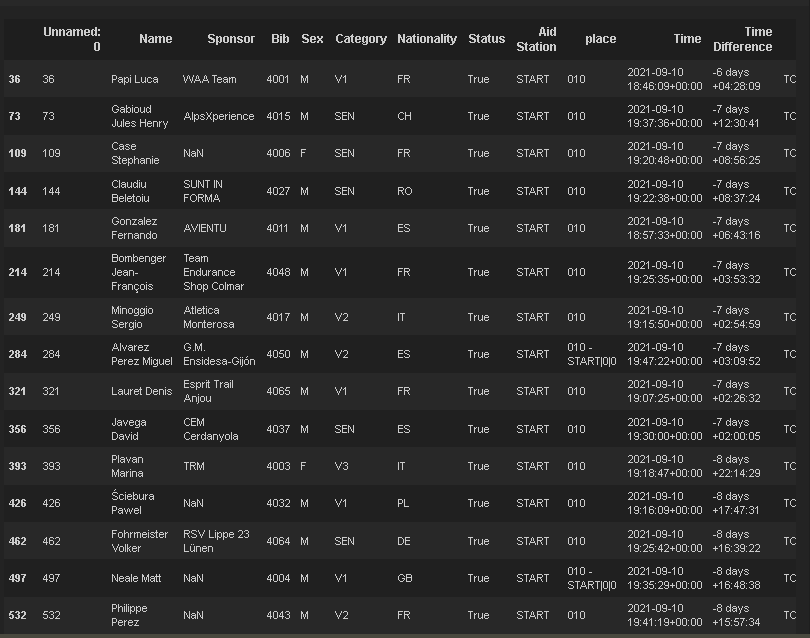

### Adding dates into TOR330 and TOR4450

In [33]:
pivoted_TOR330['Year'] = pivoted_TOR330['Year'].astype('str')
dates_duv_df['Year'] = dates_duv_df['Year'].astype('str')

# have I dropped any rows?
print(pivoted_TOR330.shape)

# Merging on two columns: 'Race' and 'Year'
pivoted_TOR330_dates = pd.merge(pivoted_TOR330, dates_duv_df, on=['Race', 'Year'], how='inner')

# have I dropped any rows?
print(pivoted_TOR330_dates.shape)



(1097, 62)
(1097, 63)


In [34]:

pivoted_TOR330_dates['new_Start Date'] = np.where(
    pivoted_TOR330_dates['Bib'] < 1001, 
        pivoted_TOR330_dates['Start Date'], 
        pivoted_TOR330_dates['Start Date'] + pd.to_timedelta('02:00:00'))

pivoted_TOR330_dates['Wave'] = np.where(
    pivoted_TOR330_dates['Bib'] < 1001, 
        'Wave1', 
        'Wave2')

pivoted_TOR330_dates[pivoted_TOR330_dates['Bib']> 1001].head()

,Name,Bib,Sex,Nationality,Year,Race,Category,Status,RITIRIO,START,Baite Youlaz,La Thuile,Rifugio Deffeyes,Bivacco Zappelli,Planaval,Valgrisenche IN,Valgrisenche OUT,Chalet Epee,Rhemes-Notre-Dame,Eaux Rousse,Rifugio Sella,Cogne IN,Cogne OUT,Goilles,Rifugio Dondena,Chardonney,Pontboset,Donnas IN,Donnas OUT,Perloz,Sassa,Rifugio Coda,Rifugio della Barma,Lago Chiaro,Col della Vecchia,Niel La Gruba,Loo,Gressoney IN,Gressoney OUT,Rifugio Alpenzu,Champoluc,Rifugio Grand Tournalin,Valtournenche IN,Valtournenche OUT,Rifugio Barmasse,Vareton,Rifugio Magià,Rifugio Cuney,Bivacco R. Clermont,Oyace IN,Bruson Arp,Col Brison,Berio Damon,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH,Start Date,new_Start Date,Wave
1,Acerbi Luca,1290,M,IT,2023,TOR330,V3,False,NaN,2023-09-10 11:22:44,2023-09-10 15:26:07,2023-09-10 16:30:04,2023-09-10 19:45:40,2023-09-10 22:10:03,2023-09-11 02:33:42,2023-09-11 04:16:59,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-10 10:00:00,2023-09-10 12:00:00,Wave2
2,Adamczyk Guillaume,1215,M,BE,2023,TOR330,V2,False,NaN,2023-09-10 11:50:58,2023-09-10 15:30:04,2023-09-10 16:47:21,2023-09-10 20:17:13,2023-09-10 22:48:46,2023-09-11 04:31:31,2023-09-11 06:20:04,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-10 10:00:00,2023-09-10 12:00:00,Wave2
3,Affre Roxane,1320,F,FR,2023,TOR330,V2,False,NaN,2023-09-10 11:19:55,2023-09-10 16:00:38,2023-09-10 17:10:31,2023-09-10 20:41:31,2023-09-10 23:22:41,2023-09-11 04:49:20,2023-09-11 06:25:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-10 10:00:00,2023-09-10 12:00:00,Wave2
5,Agostini Giancarla,1146,F,IT,2023,TOR330,V1,True,NaN,2023-09-10 11:26:06,2023-09-10 15:17:49,2023-09-10 16:26:10,2023-09-10 19:21:04,2023-09-10 21:22:29,2023-09-11 01:09:10,2023-09-11 02:34:20,2023-09-11 03:59:59,2023-09-11 06:24:54,2023-09-11 09:18:44,2023-09-11 14:29:28,2023-09-11 22:01:01,2023-09-12 00:33:47,2023-09-12 03:44:36,2023-09-12 05:11:31,2023-09-12 09:48:55,2023-09-12 11:13:57,2023-09-12 13:02:04,2023-09-12 15:13:15,2023-09-12 17:32:22,2023-09-12 19:23:32,2023-09-12 21:53:36,2023-09-13 00:13:00,2023-09-13 04:56:22,NaT,2023-09-13 10:53:14,2023-09-13 13:19:03,2023-09-13 16:10:57,2023-09-13 18:02:04,2023-09-13 21:54:02,2023-09-13 23:23:02,2023-09-14 04:23:26,2023-09-14 07:56:51,2023-09-14 10:33:55,2023-09-14 12:05:29,2023-09-14 13:53:03,2023-09-14 15:36:02,2023-09-14 18:50:27,2023-09-14 20:48:27,2023-09-15 00:53:28,2023-09-15 04:42:55,2023-09-15 07:19:48,2023-09-15 08:19:47,2023-09-15 09:26:42,2023-09-15 10:01:44,2023-09-15 12:04:11,2023-09-15 14:03:37,2023-09-15 16:14:59,2023-09-15 18:32:12,2023-09-15 22:05:20,2023-09-16 00:46:37,2023-09-16 03:13:12,2023-09-16 04:41:04,2023-09-10 10:00:00,2023-09-10 12:00:00,Wave2
6,Akimoto Kenji,1161,M,JP,2023,TOR330,V3,False,NaN,2023-09-10 11:39:53,2023-09-10 15:23:21,2023-09-10 16:27:55,2023-09-10 19:53:37,2023-09-10 22:25:34,2023-09-11 02:31:55,2023-09-11 03:44:52,2023-09-11 04:52:54,2023-09-11 07:13:03,2023-09-11 10:35:48,2023-09-11 18:16:50,2023-09-12 02:35:14,2023-09-12 05:08:41,2023-09-12 06:58:15,2023-09-12 08:28:24,2023-09-12 14:08:44,NaT,2023-09-12 17:49:44,2023-09-12 21:08:40,2023-09-13 01:06:12,2023-09-13 03:15:14,2023-09-13 07:19:53,2023-09-13 10:11:29,2023-09-13 14:18:01,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-10 10:00:00,2023-09-10 12:00:00,Wave2


In [35]:
# Calculate Duration
pivoted_TOR330_dates['Duration'] = pivoted_TOR330_dates['FINISH'] - pivoted_TOR330_dates['new_Start Date'] 

# Sort the DataFrame by the 'Duration' column
pivoted_TOR330_dates = pivoted_TOR330_dates.sort_values(by='Duration')


In [ ]:
# Reorder the columns in the correct order
pivoted_TOR330_dates = pivoted_TOR330_dates[[
        'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category', 'Status','Wave', 'Duration','RITIRIO',
        'new_Start Date', 'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes',
        'Bivacco Zappelli', 'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT',
        'Chalet Epee', 'Rhemes-Notre-Dame', 'Eaux Rousse', 'Rifugio Sella',
        'Cogne IN', 'Cogne OUT', 'Goilles', 'Rifugio Dondena', 'Chardonney',
        'Pontboset', 'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa',
        'Rifugio Coda', 'Rifugio della Barma', 'Lago Chiaro',
        'Col della Vecchia', 'Niel La Gruba', 'Loo', 'Gressoney IN',
        'Gressoney OUT', 'Rifugio Alpenzu', 'Champoluc',
        'Rifugio Grand Tournalin', 'Valtournenche IN', 'Valtournenche OUT',
        'Rifugio Barmasse', 'Vareton', 'Rifugio Magià', 'Rifugio Cuney',
        'Bivacco R. Clermont', 'Oyace IN', 'Bruson Arp', 'Col Brison',
        'Berio Damon', 'Ollomont IN', 'Ollomont OUT', 'Rifugio Champillon',
        'Ponteille Desot', 'Bosses', 'Rifugio Frassati', 'Pas Entre Deux Sauts',
        'Monte de la Saxe', 'FINISH'
]]

In [36]:
print(pivoted_TOR330_dates['Duration'][pivoted_TOR330_dates['Name'].str.contains('Jonina')])
print(TORX_duv_df['Performance'][TORX_duv_df['Name'].str.contains('Jonina')])
# Finished in 144:46:43 hours and 

486   6 days 00:46:43
Name: Duration, dtype: timedelta64[ns]
5291    6.032442
Name: Performance, dtype: float64


In [37]:
# Group by 'Status' and count occurrences in each group
status_counts = pivoted_TOR330_dates.groupby('Status')['Status'].count()

# Display the counts
print(status_counts)


Status
False    476
True     621
Name: Status, dtype: int64


In [38]:
for i in pivoted_TOR330_dates.columns: 
    print(i, pivoted_TOR330_dates[i].isna().sum())

Name 0
Bib 0
Sex 0
Nationality 0
Year 0
Race 0
Category 0
Status 0
Wave 0
Duration 476
RITIRIO 962
new_Start Date 0
Baite Youlaz 6
La Thuile 8
Rifugio Deffeyes 20
Bivacco Zappelli 27
Planaval 37
Valgrisenche IN 43
Valgrisenche OUT 91
Chalet Epee 141
Rhemes-Notre-Dame 112
Eaux Rousse 141
Rifugio Sella 371
Cogne IN 208
Cogne OUT 281
Goilles 233
Rifugio Dondena 250
Chardonney 241
Pontboset 258
Donnas IN 253
Donnas OUT 269
Perloz 264
Sassa 277
Rifugio Coda 280
Rifugio della Barma 298
Lago Chiaro 321
Col della Vecchia 326
Niel La Gruba 348
Loo 368
Gressoney IN 396
Gressoney OUT 408
Rifugio Alpenzu 415
Champoluc 417
Rifugio Grand Tournalin 429
Valtournenche IN 426
Valtournenche OUT 435
Rifugio Barmasse 433
Vareton 435
Rifugio Magià 439
Rifugio Cuney 446
Bivacco R. Clermont 448
Oyace IN 448
Bruson Arp 465
Col Brison 552
Berio Damon 532
Ollomont IN 470
Ollomont OUT 482
Rifugio Champillon 501
Ponteille Desot 469
Bosses 470
Rifugio Frassati 476
Pas Entre Deux Sauts 484
Monte de la Saxe 504
FINIS

### Only Finishers

In [39]:
pivoted_TOR330_dates_noDNF = pivoted_TOR330_dates[(pivoted_TOR330_dates['Status'] == True) &
                    ~(pivoted_TOR330_dates['FINISH'].isna())].reset_index()


for i in pivoted_TOR330_dates_noDNF.columns: 
    print(i, pivoted_TOR330_dates_noDNF[i].isna().sum())


index 0
Name 0
Bib 0
Sex 0
Nationality 0
Year 0
Race 0
Category 0
Status 0
Wave 0
Duration 0
RITIRIO 621
new_Start Date 0
Baite Youlaz 1
La Thuile 1
Rifugio Deffeyes 1
Bivacco Zappelli 1
Planaval 0
Valgrisenche IN 0
Valgrisenche OUT 1
Chalet Epee 5
Rhemes-Notre-Dame 2
Eaux Rousse 0
Rifugio Sella 148
Cogne IN 3
Cogne OUT 31
Goilles 1
Rifugio Dondena 7
Chardonney 0
Pontboset 7
Donnas IN 4
Donnas OUT 9
Perloz 2
Sassa 5
Rifugio Coda 0
Rifugio della Barma 2
Lago Chiaro 8
Col della Vecchia 4
Niel La Gruba 1
Loo 0
Gressoney IN 0
Gressoney OUT 3
Rifugio Alpenzu 1
Champoluc 1
Rifugio Grand Tournalin 4
Valtournenche IN 0
Valtournenche OUT 5
Rifugio Barmasse 2
Vareton 3
Rifugio Magià 2
Rifugio Cuney 2
Bivacco R. Clermont 0
Oyace IN 0
Bruson Arp 10
Col Brison 86
Berio Damon 62
Ollomont IN 5
Ollomont OUT 16
Rifugio Champillon 32
Ponteille Desot 2
Bosses 0
Rifugio Frassati 1
Pas Entre Deux Sauts 9
Monte de la Saxe 29
FINISH 0


In [40]:
pivoted_TOR330_dates.groupby(['Wave', 'Status'])['Status'].size()

Wave   Status
Wave1  False     194
       True      407
Wave2  False     282
       True      214
Name: Status, dtype: int64

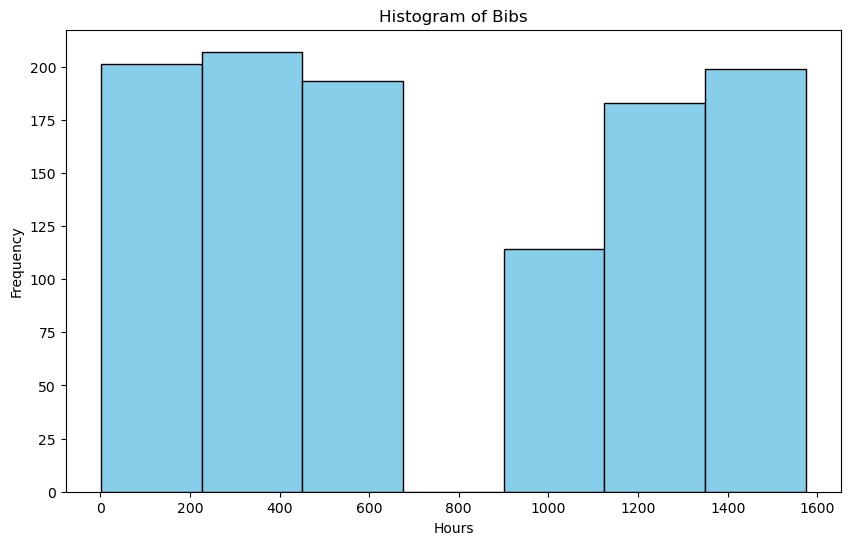

In [41]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(pivoted_TOR330_dates['Bib'], bins=7, color='skyblue', edgecolor='black')
plt.title(f'Histogram of Bibs')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

### Cleaning DNFs 

In [42]:
pivoted_TOR330_dates_DNF = pivoted_TOR330_dates[
                    # selecting all rows that DNFed
                    (pivoted_TOR330_dates['Status'] == False) & # AND
                    # selecting all rows where FINISH does not have a time
                    (pivoted_TOR330_dates['FINISH'].isna())]

pivoted_TOR330_dates_DNF.head()

,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Wave,Duration,RITIRIO,new_Start Date,Baite Youlaz,La Thuile,Rifugio Deffeyes,Bivacco Zappelli,Planaval,Valgrisenche IN,Valgrisenche OUT,Chalet Epee,Rhemes-Notre-Dame,Eaux Rousse,Rifugio Sella,Cogne IN,Cogne OUT,Goilles,Rifugio Dondena,Chardonney,Pontboset,Donnas IN,Donnas OUT,Perloz,Sassa,Rifugio Coda,Rifugio della Barma,Lago Chiaro,Col della Vecchia,Niel La Gruba,Loo,Gressoney IN,Gressoney OUT,Rifugio Alpenzu,Champoluc,Rifugio Grand Tournalin,Valtournenche IN,Valtournenche OUT,Rifugio Barmasse,Vareton,Rifugio Magià,Rifugio Cuney,Bivacco R. Clermont,Oyace IN,Bruson Arp,Col Brison,Berio Damon,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH
1,Acerbi Luca,1290,M,IT,2023,TOR330,V3,False,Wave2,NaT,NaN,2023-09-10 12:00:00,2023-09-10 15:26:07,2023-09-10 16:30:04,2023-09-10 19:45:40,2023-09-10 22:10:03,2023-09-11 02:33:42,2023-09-11 04:16:59,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,Adamczyk Guillaume,1215,M,BE,2023,TOR330,V2,False,Wave2,NaT,NaN,2023-09-10 12:00:00,2023-09-10 15:30:04,2023-09-10 16:47:21,2023-09-10 20:17:13,2023-09-10 22:48:46,2023-09-11 04:31:31,2023-09-11 06:20:04,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,Affre Roxane,1320,F,FR,2023,TOR330,V2,False,Wave2,NaT,NaN,2023-09-10 12:00:00,2023-09-10 16:00:38,2023-09-10 17:10:31,2023-09-10 20:41:31,2023-09-10 23:22:41,2023-09-11 04:49:20,2023-09-11 06:25:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
6,Akimoto Kenji,1161,M,JP,2023,TOR330,V3,False,Wave2,NaT,NaN,2023-09-10 12:00:00,2023-09-10 15:23:21,2023-09-10 16:27:55,2023-09-10 19:53:37,2023-09-10 22:25:34,2023-09-11 02:31:55,2023-09-11 03:44:52,2023-09-11 04:52:54,2023-09-11 07:13:03,2023-09-11 10:35:48,2023-09-11 18:16:50,2023-09-12 02:35:14,2023-09-12 05:08:41,2023-09-12 06:58:15,2023-09-12 08:28:24,2023-09-12 14:08:44,NaT,2023-09-12 17:49:44,2023-09-12 21:08:40,2023-09-13 01:06:12,2023-09-13 03:15:14,2023-09-13 07:19:53,2023-09-13 10:11:29,2023-09-13 14:18:01,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
10,Altmann Joachim,206,M,DE,2023,TOR330,V1,False,Wave1,NaT,Cogne IN - RITIRO,2023-09-10 10:00:00,2023-09-10 12:12:44,2023-09-10 12:53:07,2023-09-10 14:51:08,2023-09-10 16:00:07,2023-09-10 18:10:30,2023-09-10 18:55:36,2023-09-10 19:06:18,2023-09-10 20:33:10,2023-09-10 22:11:27,2023-09-11 01:53:14,2023-09-11 06:24:18,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [43]:
pivoted_TOR330_dates_DNF.isna().sum()

Name                         0
Bib                          0
Sex                          0
Nationality                  0
Year                         0
Race                         0
Category                     0
Status                       0
Wave                         0
Duration                   476
RITIRIO                    341
new_Start Date               0
Baite Youlaz                 5
La Thuile                    7
Rifugio Deffeyes            19
Bivacco Zappelli            26
Planaval                    37
Valgrisenche IN             43
Valgrisenche OUT            90
Chalet Epee                136
Rhemes-Notre-Dame          110
Eaux Rousse                141
Rifugio Sella              223
Cogne IN                   205
Cogne OUT                  250
Goilles                    232
Rifugio Dondena            243
Chardonney                 241
Pontboset                  251
Donnas IN                  249
Donnas OUT                 260
Perloz                     262
Sassa   

### What is the last place of DNFs?

In [44]:
# Function to find the last non-blank column
def get_last_non_blank(row):
    for col in reversed(row.index):
        if pd.notna(row[col]):  # Check if the value is not NaN
#             print(col)
            return col
#     return None  # In case all columns are blank

# # Apply the function to each row and assign the result to 'Retired'
pivoted_TOR330_dates_DNF['Retired'] = pivoted_TOR330_dates_DNF.apply(get_last_non_blank, axis=1)


C:\Users\Karina\AppData\Local\Temp\ipykernel_13696\358637973.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivoted_TOR330_dates_DNF['Retired'] = pivoted_TOR330_dates_DNF.apply(get_last_non_blank, axis=1)


In [45]:
pivoted_TOR330_dates_DNF.columns

Index(['Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category',
       'Status', 'Wave', 'Duration', 'RITIRIO', 'new_Start Date',
       'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 'Bivacco Zappelli',
       'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT', 'Chalet Epee',
       'Rhemes-Notre-Dame', 'Eaux Rousse', 'Rifugio Sella', 'Cogne IN',
       'Cogne OUT', 'Goilles', 'Rifugio Dondena', 'Chardonney', 'Pontboset',
       'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa', 'Rifugio Coda',
       'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia',
       'Niel La Gruba', 'Loo', 'Gressoney IN', 'Gressoney OUT',
       'Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin',
       'Valtournenche IN', 'Valtournenche OUT', 'Rifugio Barmasse', 'Vareton',
       'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 'Oyace IN',
       'Bruson Arp', 'Col Brison', 'Berio Damon', 'Ollomont IN',
       'Ollomont OUT', 'Rifugio Champillon', 'Ponteille Desot', 'Bosses',
     

In [46]:
pivoted_TOR330_dates_DNF = pivoted_TOR330_dates_DNF[['Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category',
       'Status', 'Wave', 'Duration', 'RITIRIO', 'Retired','new_Start Date',
       'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 'Bivacco Zappelli',
       'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT', 'Chalet Epee',
       'Rhemes-Notre-Dame', 'Eaux Rousse', 'Rifugio Sella', 'Cogne IN',
       'Cogne OUT', 'Goilles', 'Rifugio Dondena', 'Chardonney', 'Pontboset',
       'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa', 'Rifugio Coda',
       'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia',
       'Niel La Gruba', 'Loo', 'Gressoney IN', 'Gressoney OUT',
       'Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin',
       'Valtournenche IN', 'Valtournenche OUT', 'Rifugio Barmasse', 'Vareton',
       'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 'Oyace IN',
       'Bruson Arp', 'Col Brison', 'Berio Damon', 'Ollomont IN',
       'Ollomont OUT', 'Rifugio Champillon', 'Ponteille Desot', 'Bosses',
       'Rifugio Frassati', 'Pas Entre Deux Sauts', 'Monte de la Saxe',
       'FINISH']]

# pivoted_TOR330_dates_DNF.to_excel('retired_df.xlsx', index = False)


### Cleaning Last location

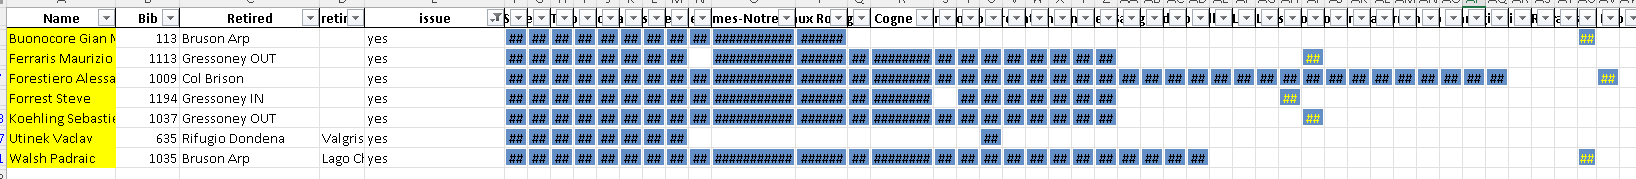


In [47]:
names_that_DNFed_and_then_popped_up_miles_away =['Utinek Vaclav', 'Walsh Padraic',
                                                'Ferraris Maurizio', 'Buonocore Gian Mario',
                                                'Forestiero Alessandro', 'Forrest Steve',
                                                 'Koehling Sebastien'
                                                ]

In [48]:
pivot_DNF = pivoted_TOR330_dates_DNF.copy()

# Ensure you're modifying the original DataFrame directly
for index, row in pivot_DNF[pivot_DNF['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)].iterrows():
    retired_column = row['Retired']  # Get the column name in 'Retired'
    
    # Check if the 'Retired' value is a valid column in the specified list
    if retired_column in [
   'Rifugio Dondena', 'Gressoney IN', 'Gressoney OUT', 'Col Brison',  'Bruson Arp',
    ]:
        # Update the specific cell for the 'retired_column'
        pivot_DNF.at[index, retired_column] = pd.NaT

# Display the updated DataFrame
pivot_DNF[['Name',
   'Rifugio Dondena', 'Gressoney IN', 'Gressoney OUT', 'Col Brison',  'Bruson Arp',
       'Retired']][pivot_DNF['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)]

,Name,Rifugio Dondena,Gressoney IN,Gressoney OUT,Col Brison,Bruson Arp,Retired
129,Buonocore Gian Mario,NaT,NaT,NaT,NaT,NaT,Bruson Arp
323,Ferraris Maurizio,2023-09-12 12:41:59,NaT,NaT,NaT,NaT,Gressoney OUT
338,Forestiero Alessandro,2023-09-12 10:36:09,2023-09-13 22:51:31,2023-09-14 02:45:31,NaT,NaT,Col Brison
341,Forrest Steve,2023-09-12 12:29:19,NaT,NaT,NaT,NaT,Gressoney IN
509,Koehling Sebastien,2023-09-12 06:19:56,NaT,NaT,NaT,NaT,Gressoney OUT
1009,Utinek Vaclav,NaT,NaT,NaT,NaT,NaT,Rifugio Dondena
1051,Walsh Padraic,2023-09-12 10:33:12,NaT,NaT,NaT,NaT,Bruson Arp


In [49]:
# Drop the intermediate columns if they're no longer needed
pivot_DNF = pivot_DNF.drop(columns=['Retired'])    

# Apply the function to each row and assign the result to 'Retired'
pivot_DNF['Retired'] = pivot_DNF.apply(get_last_non_blank, axis=1)



In [50]:
# Display the updated DataFrame
pivot_DNF[['Name',
   'Rifugio Dondena', 'Gressoney IN', 'Gressoney OUT', 'Col Brison',  'Bruson Arp',
       'Retired']][pivot_DNF['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)]


,Name,Rifugio Dondena,Gressoney IN,Gressoney OUT,Col Brison,Bruson Arp,Retired
129,Buonocore Gian Mario,NaT,NaT,NaT,NaT,NaT,Eaux Rousse
323,Ferraris Maurizio,2023-09-12 12:41:59,NaT,NaT,NaT,NaT,Perloz
338,Forestiero Alessandro,2023-09-12 10:36:09,2023-09-13 22:51:31,2023-09-14 02:45:31,NaT,NaT,Rifugio Magià
341,Forrest Steve,2023-09-12 12:29:19,NaT,NaT,NaT,NaT,Perloz
509,Koehling Sebastien,2023-09-12 06:19:56,NaT,NaT,NaT,NaT,Perloz
1009,Utinek Vaclav,NaT,NaT,NaT,NaT,NaT,Valgrisenche OUT
1051,Walsh Padraic,2023-09-12 10:33:12,NaT,NaT,NaT,NaT,Lago Chiaro


In [59]:
section1 = ['Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 
            'Bivacco Zappelli', 'Planaval', 'Valgrisenche IN']
section2 = [ 'Valgrisenche OUT', 'Chalet Epee', 'Rhemes-Notre-Dame',
            'Eaux Rousse', 'Rifugio Sella', 'Cogne IN']

section3 = ['Cogne OUT', 'Goilles', 'Rifugio Dondena', 'Chardonney', 'Pontboset', 'Donnas IN']
section4  = ['Donnas OUT', 'Perloz', 'Sassa', 'Rifugio Coda',
            'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia',
            'Niel La Gruba', 'Loo', 'Gressoney IN']

section5 = ['Gressoney OUT','Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin', 'Valtournenche IN'] 

section6 = ['Valtournenche OUT', 'Rifugio Barmasse', 'Vareton',
            'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 'Oyace IN',
            'Bruson Arp', 'Col Brison', 'Berio Damon', 'Ollomont IN']
        
section7 = ['Ollomont OUT', 'Rifugio Champillon', 'Ponteille Desot', 'Bosses',
            'Rifugio Frassati', 'Pas Entre Deux Sauts', 'Monte de la Saxe',
            'FINISH']

# finding the low / high season by date
pivot_DNF.loc[pivot_DNF['Retired'].isin(section1), 'Retired_Section'] = 'Retired during Section 1'
pivot_DNF.loc[pivot_DNF['Retired'].isin(section2), 'Retired_Section'] = 'Retired during Section 2'
pivot_DNF.loc[pivot_DNF['Retired'].isin(section3), 'Retired_Section'] = 'Retired during Section 3'
pivot_DNF.loc[pivot_DNF['Retired'].isin(section4), 'Retired_Section'] = 'Retired during Section 4'
pivot_DNF.loc[pivot_DNF['Retired'].isin(section5), 'Retired_Section'] = 'Retired during Section 5'
pivot_DNF.loc[pivot_DNF['Retired'].isin(section6), 'Retired_Section'] = 'Retired during Section 6'
pivot_DNF.loc[pivot_DNF['Retired'].isin(section7), 'Retired_Section'] = 'Retired during Section 7'


In [60]:
pivot_DNF.groupby('Retired_Section')['Retired_Section'].count()

Retired_Section
Retired during Section 1     86
Retired during Section 2    138
Retired during Section 3     32
Retired during Section 4    147
Retired during Section 5     23
Retired during Section 6     36
Retired during Section 7     10
Name: Retired_Section, dtype: int64

In [61]:
# DNS?
pivoted_TOR330_dates_DNF[pivoted_TOR330_dates_DNF['Retired'] == 'new_Start Date']

,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Wave,Duration,RITIRIO,Retired,new_Start Date,Baite Youlaz,La Thuile,Rifugio Deffeyes,Bivacco Zappelli,Planaval,Valgrisenche IN,Valgrisenche OUT,Chalet Epee,Rhemes-Notre-Dame,Eaux Rousse,Rifugio Sella,Cogne IN,Cogne OUT,Goilles,Rifugio Dondena,Chardonney,Pontboset,Donnas IN,Donnas OUT,Perloz,Sassa,Rifugio Coda,Rifugio della Barma,Lago Chiaro,Col della Vecchia,Niel La Gruba,Loo,Gressoney IN,Gressoney OUT,Rifugio Alpenzu,Champoluc,Rifugio Grand Tournalin,Valtournenche IN,Valtournenche OUT,Rifugio Barmasse,Vareton,Rifugio Magià,Rifugio Cuney,Bivacco R. Clermont,Oyace IN,Bruson Arp,Col Brison,Berio Damon,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH
361,Galli Alberto,1202,M,IT,2023,TOR330,V2,False,Wave2,NaT,NaN,new_Start Date,2023-09-10 12:00:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
597,Marziano Gianfranco,1367,M,IT,2023,TOR330,V2,False,Wave2,NaT,NaN,new_Start Date,2023-09-10 12:00:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1007,Ueno Takumi,535,M,JP,2023,TOR330,V3,False,Wave1,NaT,NaN,new_Start Date,2023-09-10 10:00:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1026,Veltman Ari,1218,M,IL,2023,TOR330,V2,False,Wave2,NaT,NaN,new_Start Date,2023-09-10 12:00:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [62]:
# Group by 'Status' and count occurrences in each group
pivot_DNF.groupby('Retired')['Retired'].count()

Retired
Baite Youlaz                2
Bivacco R. Clermont         3
Bivacco Zappelli            8
Bosses                      5
Bruson Arp                  6
Chalet Epee                 6
Champoluc                   8
Chardonney                  8
Cogne IN                   24
Cogne OUT                   4
Col Brison                  2
Col della Vecchia          27
Donnas IN                  11
Donnas OUT                  2
Eaux Rousse                53
Goilles                     3
Gressoney IN               11
Gressoney OUT               7
La Thuile                  13
Lago Chiaro                 9
Loo                        28
Monte de la Saxe            1
Niel La Gruba              21
Ollomont IN                 1
Ollomont OUT                1
Oyace IN                    9
Perloz                      9
Planaval                    9
Pontboset                   2
Ponteille Desot             3
Rhemes-Notre-Dame          32
Rifugio Alpenzu             2
Rifugio Barmasse            1
Ri

### Calculating the Times for each section

In [63]:
pivoted_TOR330_dates['Section1 Time'] = pivoted_TOR330_dates['Valgrisenche IN'] - pivoted_TOR330_dates['new_Start Date']
pivoted_TOR330_dates['Time Spent in Valgrisenche'] = pivoted_TOR330_dates['Valgrisenche OUT'] - pivoted_TOR330_dates['Valgrisenche IN']

pivoted_TOR330_dates['Section2 Time'] = pivoted_TOR330_dates['Cogne IN'] - pivoted_TOR330_dates['Valgrisenche OUT']
pivoted_TOR330_dates['Time Spent in Cogne'] = pivoted_TOR330_dates['Cogne OUT'] - pivoted_TOR330_dates['Cogne IN']


pivoted_TOR330_dates['Section3 Time'] = pivoted_TOR330_dates['Donnas IN'] - pivoted_TOR330_dates['Cogne OUT']
pivoted_TOR330_dates['Time Spent in Donnas'] = pivoted_TOR330_dates['Donnas OUT'] - pivoted_TOR330_dates['Donnas IN']


pivoted_TOR330_dates['Section4 Time'] = pivoted_TOR330_dates['Gressoney IN'] - pivoted_TOR330_dates['Donnas OUT']
pivoted_TOR330_dates['Time Spent in Gressoney'] = pivoted_TOR330_dates['Gressoney OUT'] - pivoted_TOR330_dates['Gressoney IN']

pivoted_TOR330_dates['Section5 Time'] = pivoted_TOR330_dates['Valtournenche IN'] - pivoted_TOR330_dates['Gressoney OUT']
pivoted_TOR330_dates['Time Spent in Valtournenche'] = pivoted_TOR330_dates['Valtournenche OUT'] - pivoted_TOR330_dates['Valtournenche IN']

pivoted_TOR330_dates['Section6 Time'] = pivoted_TOR330_dates['Ollomont IN'] - pivoted_TOR330_dates['Valtournenche OUT']
pivoted_TOR330_dates['Time Spent in Ollomont'] = pivoted_TOR330_dates['Ollomont OUT'] - pivoted_TOR330_dates['Ollomont IN']

pivoted_TOR330_dates['Section7 Time'] = pivoted_TOR330_dates['FINISH'] - pivoted_TOR330_dates['Ollomont OUT']

In [64]:
sub_pivoted_TOR330_dates= pivoted_TOR330_dates[[
            'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category',
            'Status', 'Wave','RITIRIO', 'Duration', 'new_Start Date', 
            'Valgrisenche IN', 'Valgrisenche OUT', 
             'Cogne IN','Cogne OUT', 

            'Donnas IN', 'Donnas OUT', 
            'Gressoney IN', 'Gressoney OUT',

            'Valtournenche IN', 'Valtournenche OUT', 
            'Ollomont IN','Ollomont OUT', 
            'FINISH',

            #####
            'Section1 Time', 'Time Spent in Valgrisenche',
            'Section2 Time', 'Time Spent in Cogne', 'Section3 Time',
            'Time Spent in Donnas', 'Section4 Time', 'Time Spent in Gressoney',
            'Section5 Time', 'Time Spent in Valtournenche', 'Section6 Time',
            'Time Spent in Ollomont', 'Section7 Time'
    
]]

sub_pivoted_TOR330_dates[sub_pivoted_TOR330_dates['Status'] == True].isna().sum()

Name                             0
Bib                              0
Sex                              0
Nationality                      0
Year                             0
Race                             0
Category                         0
Status                           0
Wave                             0
RITIRIO                        621
Duration                         0
new_Start Date                   0
Valgrisenche IN                  0
Valgrisenche OUT                 1
Cogne IN                         3
Cogne OUT                       31
Donnas IN                        4
Donnas OUT                       9
Gressoney IN                     0
Gressoney OUT                    3
Valtournenche IN                 0
Valtournenche OUT                5
Ollomont IN                      5
Ollomont OUT                    16
FINISH                           0
Section1 Time                    0
Time Spent in Valgrisenche       1
Section2 Time                    4
Time Spent in Cogne 

In [69]:
pivot_DNF = pivoted_TOR330_dates[pivoted_TOR330_dates['Status'] == False]
pivot_noDNF = pivoted_TOR330_dates[pivoted_TOR330_dates['Status'] == True]

# Examining the statistics TIMES for each section
for section in [ 'Section1 Time', 'Time Spent in Valgrisenche',
            'Section2 Time', 'Time Spent in Cogne', 'Section3 Time',
            'Time Spent in Donnas', 'Section4 Time', 'Time Spent in Gressoney',
            'Section5 Time', 'Time Spent in Valtournenche', 'Section6 Time',
            'Time Spent in Ollomont', 'Section7 Time']: 
    print(section.upper(), '\n',pivoted_noDNF[section].describe(),'\n', '*'*20)

SECTION1 TIME 
 count                          621
mean     0 days 11:59:06.748792270
std      0 days 01:45:10.007983075
min                0 days 07:05:31
25%                0 days 10:49:13
50%                0 days 12:02:11
75%                0 days 13:16:22
max                0 days 16:31:43
Name: Section1 Time, dtype: object 
 ********************
TIME SPENT IN VALGRISENCHE 
 count                          620
mean     0 days 01:15:47.691935483
std      0 days 00:53:45.659736193
min                0 days 00:00:36
25%                0 days 00:40:35
50%         0 days 00:59:18.500000
75%                0 days 01:38:09
max                0 days 07:31:10
Name: Time Spent in Valgrisenche, dtype: object 
 ********************
SECTION2 TIME 
 count                          617
mean     0 days 17:47:18.927066450
std         0 days 02:42:25.031013
min                0 days 09:42:55
25%                0 days 16:08:39
50%                0 days 17:51:21
75%                0 days 19:46:40
max  

In [70]:
### One guy stayed in  Valgrisenche for 7 hours... I thought it was an error... but nope it is actually geniune!
pivot_DNF[pivot_DNF['Time Spent in Valgrisenche'] == pivot_DNF['Time Spent in Valgrisenche'].max()]

,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Wave,Duration,RITIRIO,new_Start Date,Baite Youlaz,La Thuile,Rifugio Deffeyes,Bivacco Zappelli,Planaval,Valgrisenche IN,Valgrisenche OUT,Chalet Epee,Rhemes-Notre-Dame,Eaux Rousse,Rifugio Sella,Cogne IN,Cogne OUT,Goilles,Rifugio Dondena,Chardonney,Pontboset,Donnas IN,Donnas OUT,Perloz,Sassa,Rifugio Coda,Rifugio della Barma,Lago Chiaro,Col della Vecchia,Niel La Gruba,Loo,Gressoney IN,Gressoney OUT,Rifugio Alpenzu,Champoluc,Rifugio Grand Tournalin,Valtournenche IN,Valtournenche OUT,Rifugio Barmasse,Vareton,Rifugio Magià,Rifugio Cuney,Bivacco R. Clermont,Oyace IN,Bruson Arp,Col Brison,Berio Damon,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH,Section1 Time,Time Spent in Valgrisenche,Section2 Time,Time Spent in Cogne,Section3 Time,Time Spent in Donnas,Section4 Time,Time Spent in Gressoney,Section5 Time,Time Spent in Valtournenche,Section6 Time,Time Spent in Ollomont,Section7 Time
913,Signorelli Angelo,578,M,IT,2023,TOR330,V2,False,Wave1,NaT,NaN,2023-09-10 10:00:00,2023-09-10 12:46:35,2023-09-10 13:50:03,2023-09-10 16:47:26,2023-09-10 18:38:10,2023-09-10 22:03:35,2023-09-10 23:11:39,2023-09-11 04:37:56,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,0 days 13:11:39,0 days 05:26:17,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [71]:
### I thought that was IMPOSSIBLE to do Section 3 in less than 12 hours...
# Again I was wrong!

pivot_noDNF[pivot_noDNF['Section4 Time'] == pivot_noDNF['Section4 Time'].min()]

,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Wave,Duration,RITIRIO,new_Start Date,Baite Youlaz,La Thuile,Rifugio Deffeyes,Bivacco Zappelli,Planaval,Valgrisenche IN,Valgrisenche OUT,Chalet Epee,Rhemes-Notre-Dame,Eaux Rousse,Rifugio Sella,Cogne IN,Cogne OUT,Goilles,Rifugio Dondena,Chardonney,Pontboset,Donnas IN,Donnas OUT,Perloz,Sassa,Rifugio Coda,Rifugio della Barma,Lago Chiaro,Col della Vecchia,Niel La Gruba,Loo,Gressoney IN,Gressoney OUT,Rifugio Alpenzu,Champoluc,Rifugio Grand Tournalin,Valtournenche IN,Valtournenche OUT,Rifugio Barmasse,Vareton,Rifugio Magià,Rifugio Cuney,Bivacco R. Clermont,Oyace IN,Bruson Arp,Col Brison,Berio Damon,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH,Section1 Time,Time Spent in Valgrisenche,Section2 Time,Time Spent in Cogne,Section3 Time,Time Spent in Donnas,Section4 Time,Time Spent in Gressoney,Section5 Time,Time Spent in Valtournenche,Section6 Time,Time Spent in Ollomont,Section7 Time
851,Romain Olivier,662,M,FR,2023,TOR330,SEN,True,Wave1,2 days 21:49:38,NaN,2023-09-10 10:00:00,2023-09-10 11:55:19,2023-09-10 12:27:43,2023-09-10 13:59:04,2023-09-10 14:56:33,2023-09-10 16:40:49,2023-09-10 17:15:46,2023-09-10 17:19:50,2023-09-10 18:30:49,2023-09-10 19:47:18,2023-09-10 22:23:16,2023-09-11 01:58:51,2023-09-11 03:02:45,2023-09-11 03:13:39,2023-09-11 04:08:02,2023-09-11 06:53:13,2023-09-11 07:34:05,2023-09-11 08:35:05,2023-09-11 09:50:18,2023-09-11 10:20:30,2023-09-11 11:12:33,2023-09-11 12:36:32,2023-09-11 13:51:33,2023-09-11 15:42:26,2023-09-11 17:00:53,2023-09-11 18:00:17,2023-09-11 19:08:21,2023-09-11 20:47:54,2023-09-11 21:42:28,2023-09-11 21:55:32,2023-09-11 22:52:23,2023-09-12 01:49:25,2023-09-12 04:21:23,2023-09-12 05:54:42,2023-09-12 06:10:45,2023-09-12 07:33:21,NaT,2023-09-12 10:49:08,2023-09-12 12:46:00,2023-09-12 13:49:42,2023-09-12 15:33:22,2023-09-12 17:07:04,2023-09-12 17:41:41,2023-09-12 18:22:12,2023-09-12 18:42:27,2023-09-12 19:18:53,2023-09-12 20:52:03,2023-09-12 22:37:52,2023-09-13 00:19:25,2023-09-13 03:29:59,2023-09-13 05:45:09,2023-09-13 07:13:28,2023-09-13 07:49:38,0 days 07:15:46,0 days 00:04:04,0 days 09:42:55,0 days 00:10:54,0 days 06:36:39,0 days 00:30:12,0 days 11:21:58,0 days 00:13:04,0 days 07:59:10,0 days 00:16:03,0 days 12:31:42,0 days 00:36:26,0 days 12:30:45


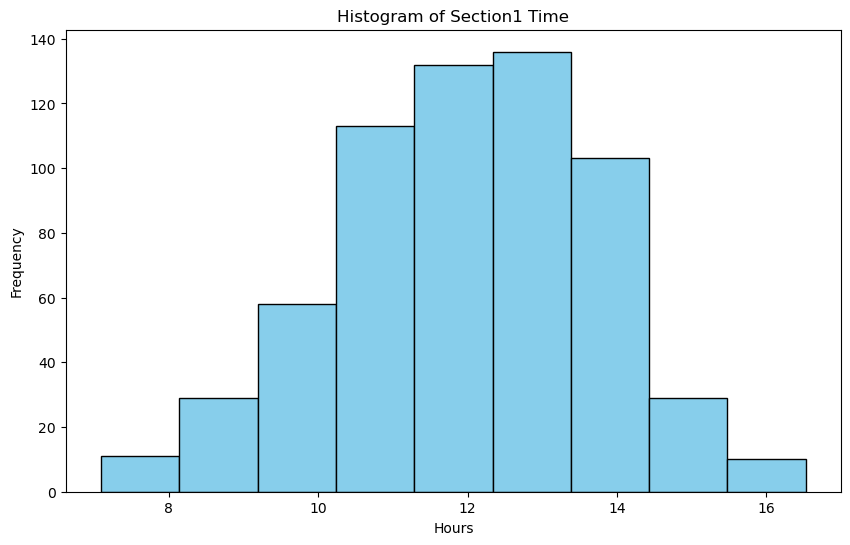

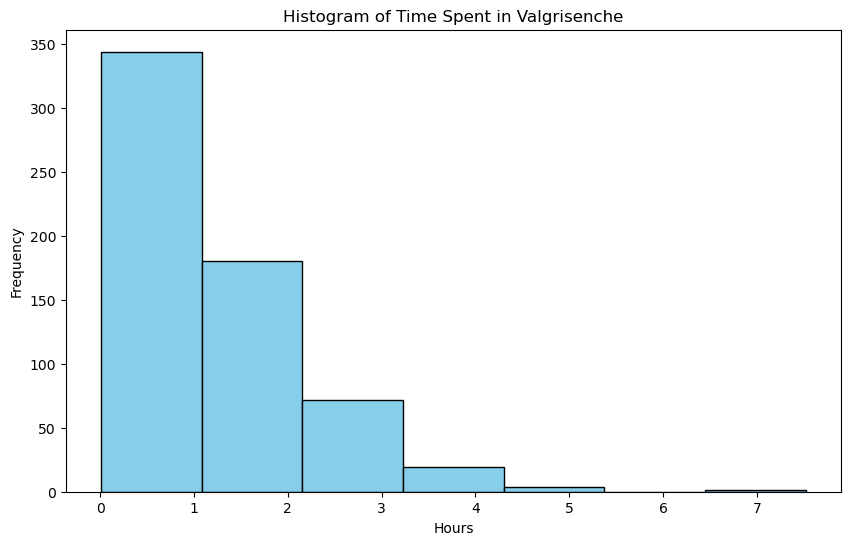

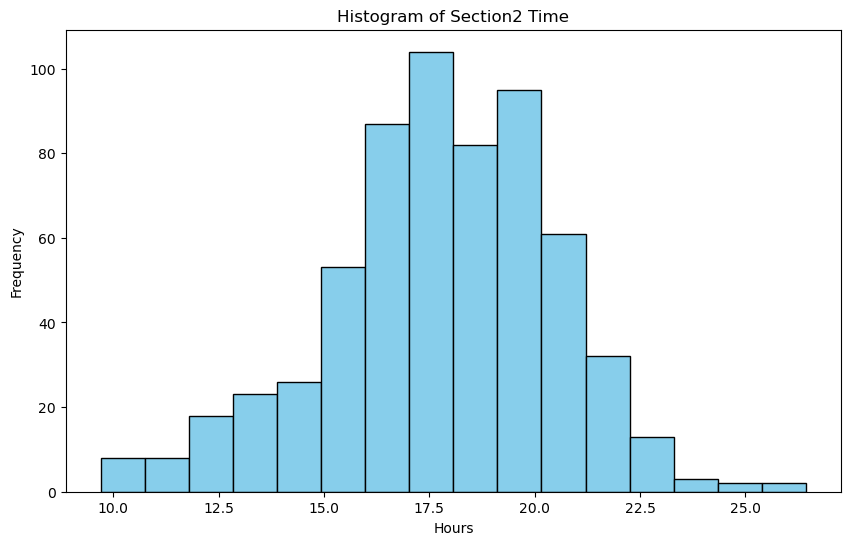

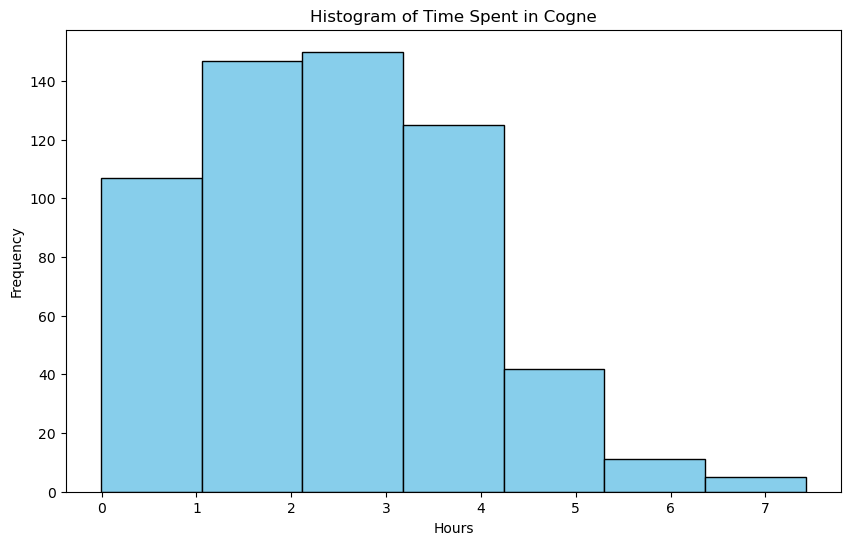

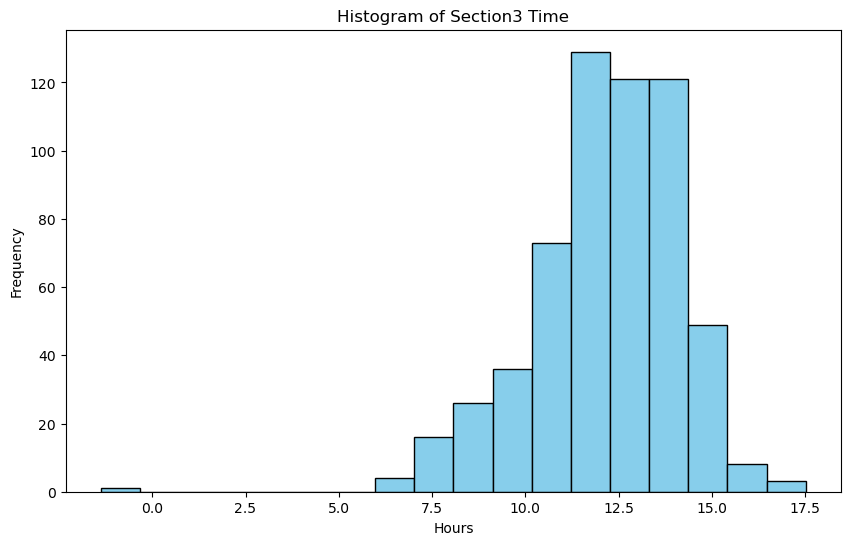

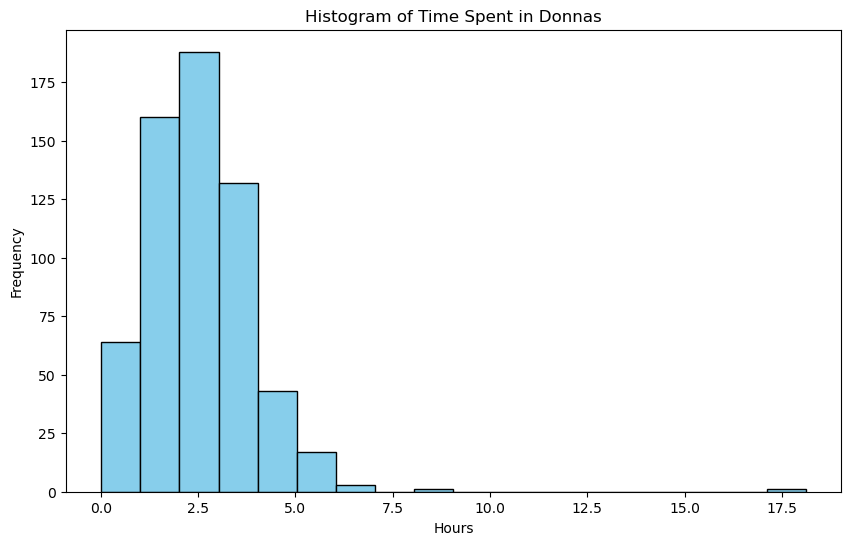

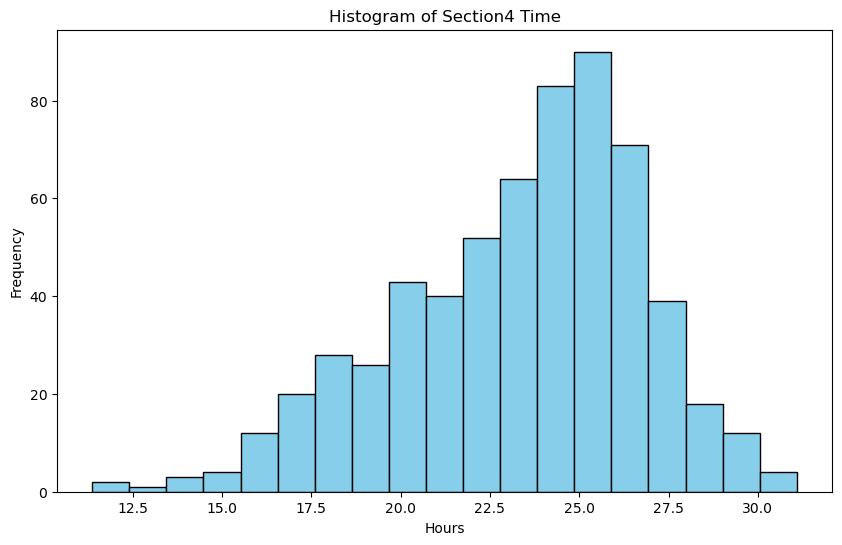

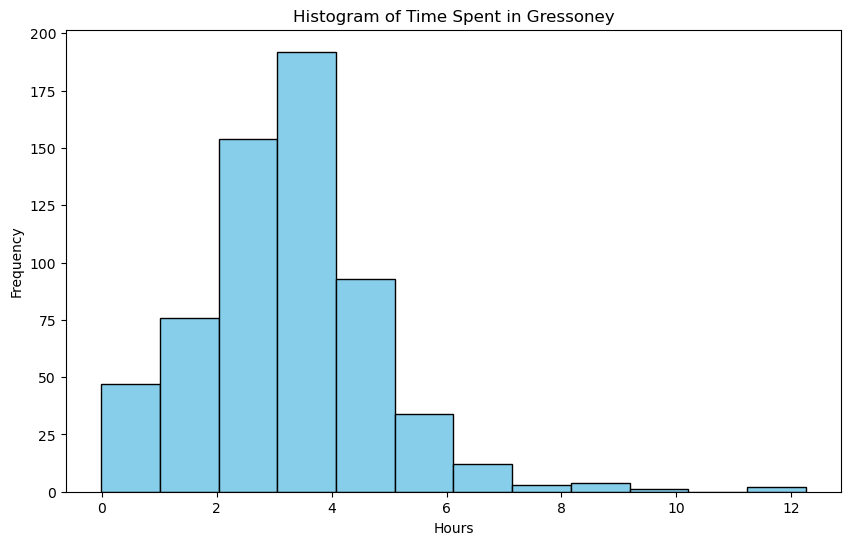

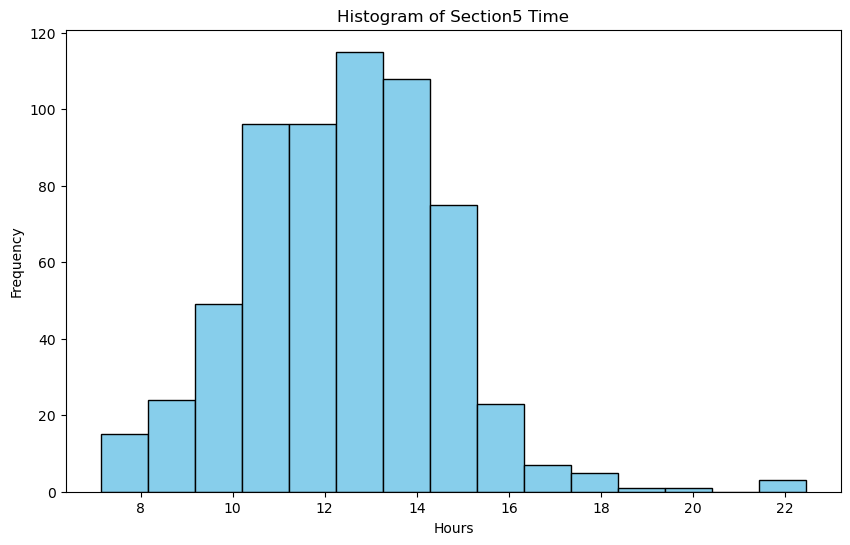

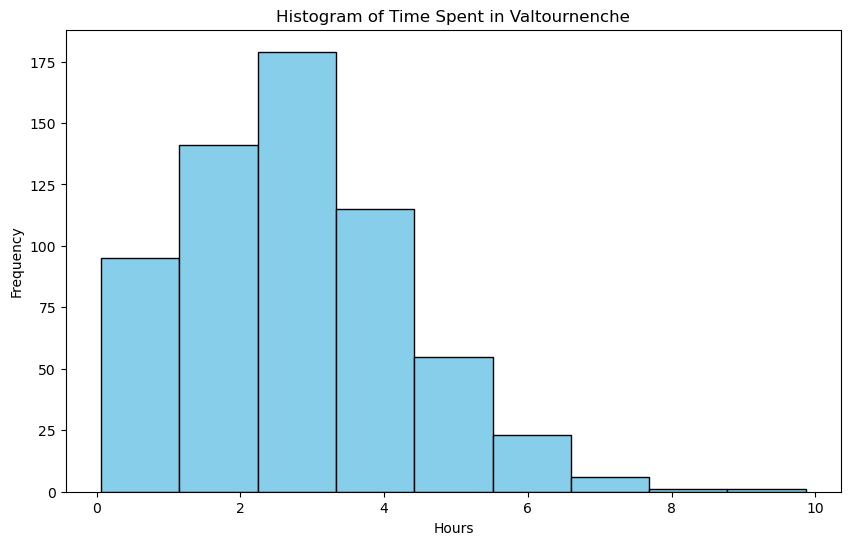

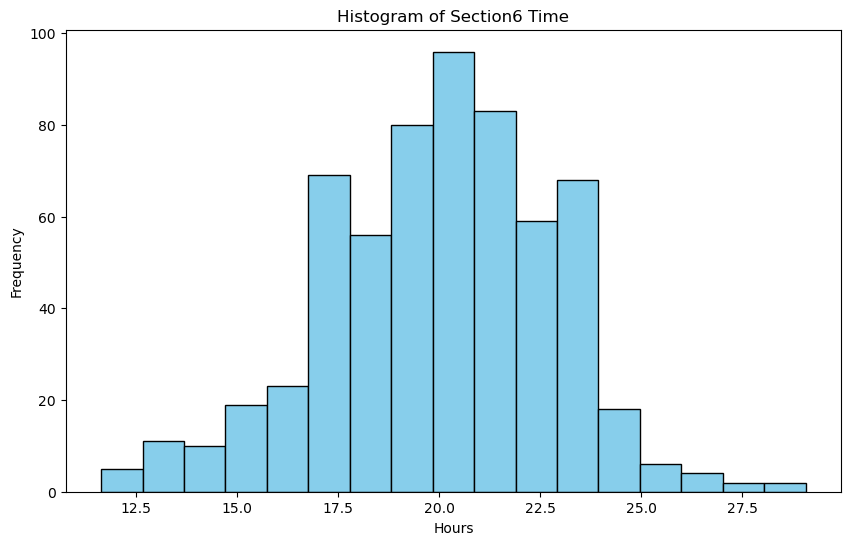

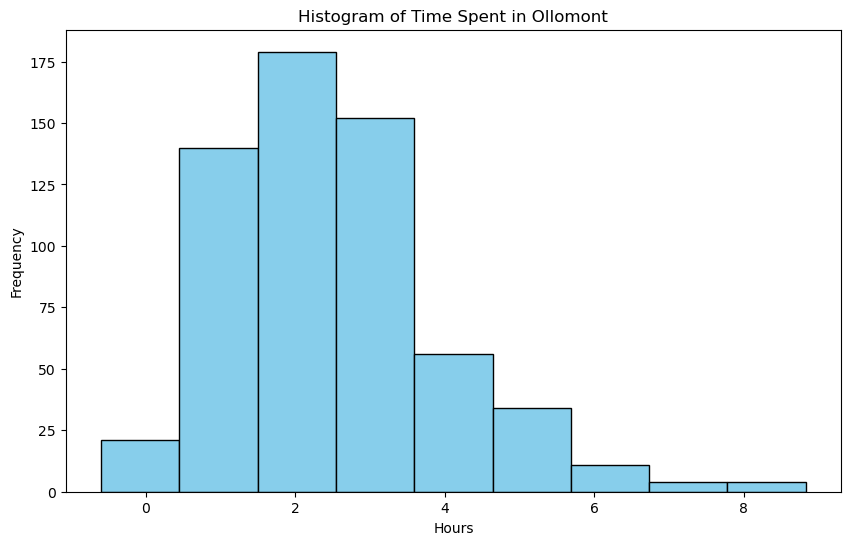

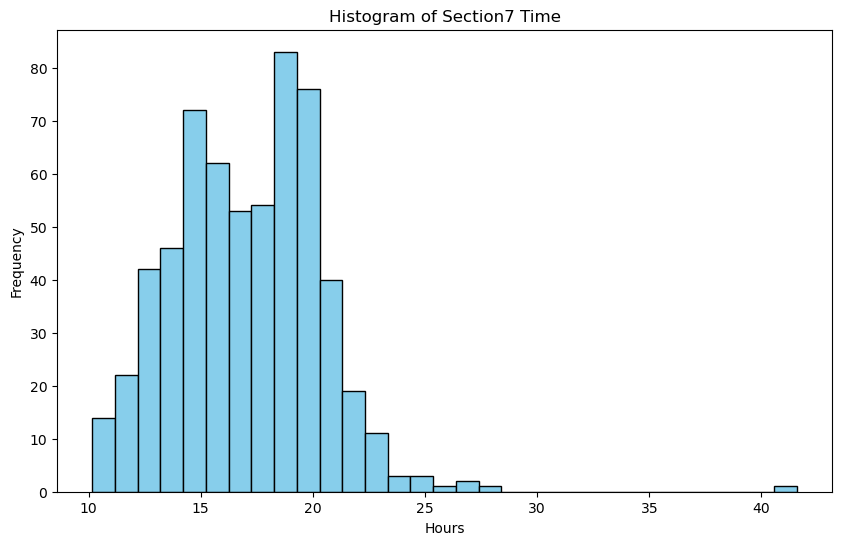

In [72]:
# creating histograms to examine the time of people who finished 
for section in [            'Section1 Time', 'Time Spent in Valgrisenche',
            'Section2 Time', 'Time Spent in Cogne', 'Section3 Time',
            'Time Spent in Donnas', 'Section4 Time', 'Time Spent in Gressoney',
            'Section5 Time', 'Time Spent in Valtournenche', 'Section6 Time',
            'Time Spent in Ollomont', 'Section7 Time']: 
    section_time = [t.total_seconds() / 3600 for t in pivot_noDNF[section]]

    max_Performance = max(section_time)
    min_Performance =  min(section_time)
    Performance_bins = int(max_Performance- min_Performance)

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(section_time, bins=Performance_bins, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {section}')
    plt.xlabel('Hours')
    plt.ylabel('Frequency')
    plt.show()